<a href="https://colab.research.google.com/github/Zelkova46/kenkyushimasu_Nikkei225/blob/main/multivariate_Cleaned_Nikkei225_daily_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Roadmap penelitian

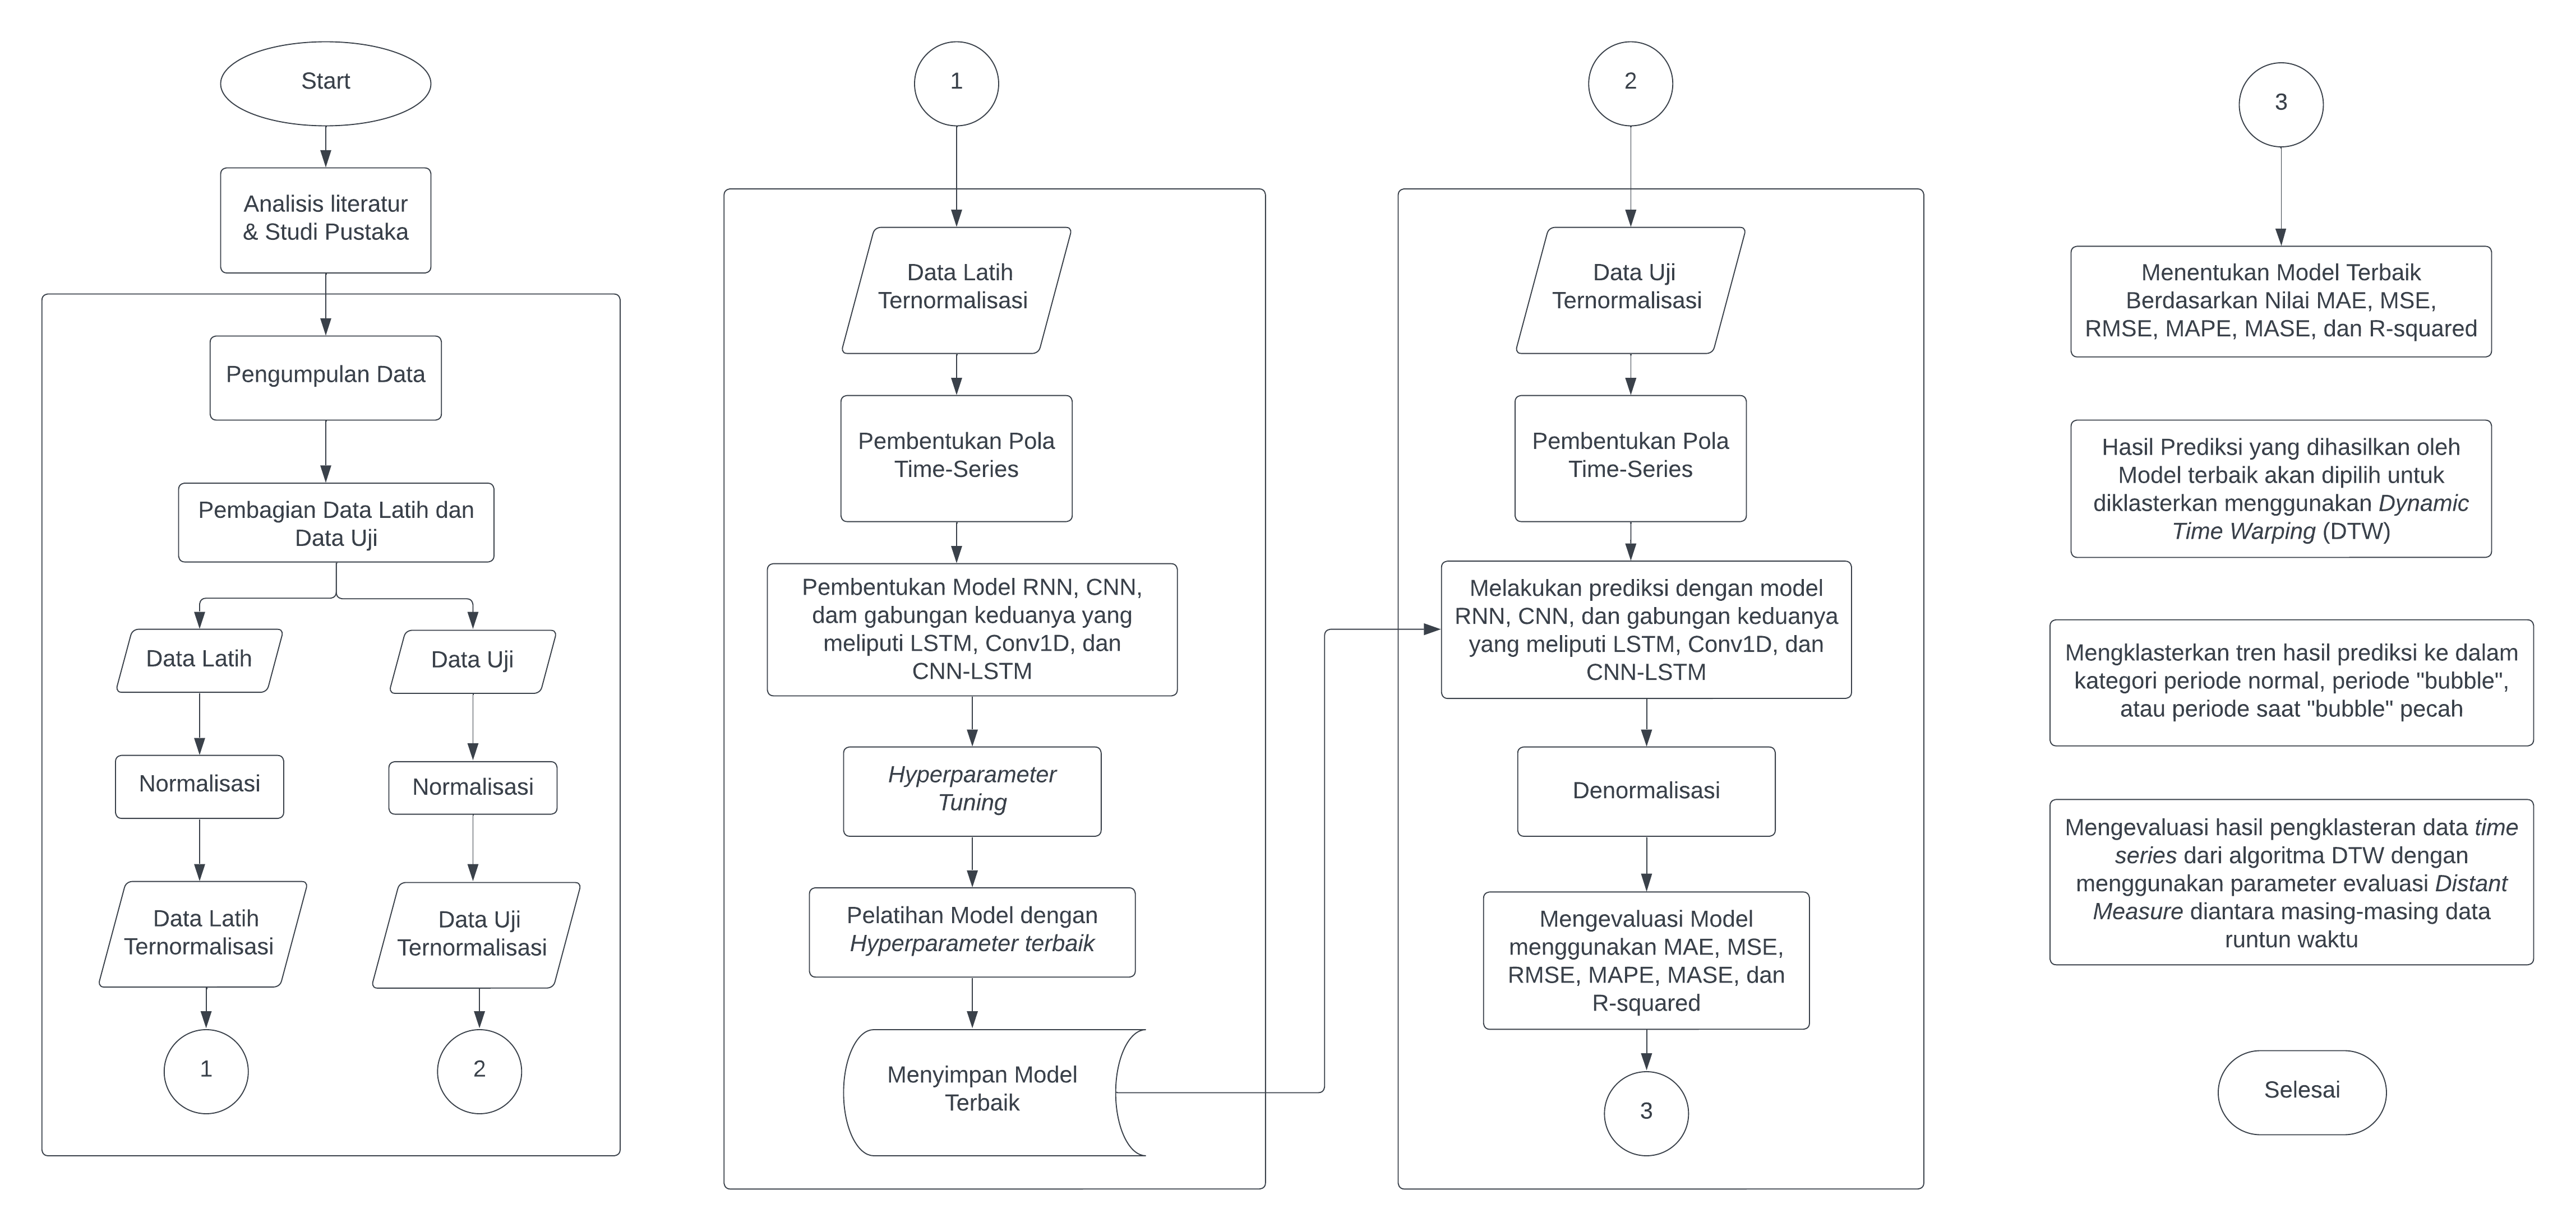

# Konek Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Get Data

Sumber data: https://indexes.nikkei.co.jp/en/nkave/archives/data?list=daily


mendownload data harga saham Nikkei225 dengan interval harian dari tahun 1968 sampai 2023

In [2]:
!wget https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/nikkei225/Nikkei225_daily.csv

--2024-03-03 00:39:02--  https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/nikkei225/Nikkei225_daily.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 734035 (717K) [text/plain]
Saving to: ‘Nikkei225_daily.csv’

Nikkei225_daily.csv 100%[===================>] 716.83K  --.-KB/s    in 0.05s   

2024-03-03 00:39:02 (15.1 MB/s) - ‘Nikkei225_daily.csv’ saved [734035/734035]



## Import data time series dengan pandas

In [3]:
# import dengan pandas
import pandas as pd

# konversi format nilai
def convert_value(value):
    # Check if the value is not NaN and not '-'
    if value != '-':
        # Remove commas and convert to float
        return float(value.replace(',', ''))
    else:
        return None

# membaca data saham Nikkei225
nikkei225_df = pd.read_csv("/content/Nikkei225_daily.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"],
                           converters = {'Open': convert_value,
                                         'High': convert_value,
                                         'Low': convert_value,
                                         'Close': convert_value})
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

nikkei225_df.tail()

,Open,High,Low,Close
Date,,,,
2023-12-25,33414.51,33414.51,33221.57,33254.03
2023-12-26,33295.68,33312.26,33181.36,33305.85
2023-12-27,33532.97,33755.75,33521.52,33681.24
2023-12-28,33477.47,33571.73,33411.24,33539.62
2023-12-29,33458.64,33652.71,33305.17,33464.17


In [4]:
nikkei225_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14628 entries, 1968-01-04 to 2023-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    9647 non-null   float64
 1   High    9647 non-null   float64
 2   Low     9647 non-null   float64
 3   Close   14628 non-null  float64
dtypes: float64(4)
memory usage: 571.4 KB


data saham hanya digunakan saat harga close

In [5]:
nikkei225_close_df = pd.DataFrame(nikkei225_df["Close"]).rename(columns={"Close": "Closing Price (Yen)"})
nikkei225_close_df.tail()


,Closing Price (Yen)
Date,
2023-12-25,33254.03
2023-12-26,33305.85
2023-12-27,33681.24
2023-12-28,33539.62
2023-12-29,33464.17


Informasi jumlah data

In [6]:
len(nikkei225_df)

14628

menampilkan missing data

In [7]:
# List the rows where the 'Close' column is nullC
rows_with_null_close = nikkei225_close_df[nikkei225_close_df['Closing Price (Yen)'].isnull()]
print(rows_with_null_close)

Empty DataFrame
Columns: [Closing Price (Yen)]
Index: []


In [8]:

nikkei225_close_df.isnull().sum()

Closing Price (Yen)    0
dtype: int64

# Bagian membuat multivariate time series dataset.

selain menggunakan data nikkei225, perdiksi harga saham akan dibantu dengan data discount rate dan money supply

multivariate time series akan menambahkan fitur lebih banyak dari univariate time series yang hanya satu fitur

import file csv





In [9]:
!wget https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/dicountRate/discountRate.csv

--2024-03-03 00:39:04--  https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/dicountRate/discountRate.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8741 (8.5K) [text/plain]
Saving to: ‘discountRate.csv’

discountRate.csv    100%[===================>]   8.54K  --.-KB/s    in 0s      

2024-03-03 00:39:04 (81.5 MB/s) - ‘discountRate.csv’ saved [8741/8741]



In [10]:
!wget https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/moneyStock/moneyStock.csv

--2024-03-03 00:39:04--  https://raw.githubusercontent.com/Zelkova46/kenkyushimasu_Nikkei225/main/datasets/moneyStock/moneyStock.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8817 (8.6K) [text/plain]
Saving to: ‘moneyStock.csv’

moneyStock.csv      100%[===================>]   8.61K  --.-KB/s    in 0s      

2024-03-03 00:39:04 (93.3 MB/s) - ‘moneyStock.csv’ saved [8817/8817]



# Import data time seres tambahan: discount rate dan money supply

import data discount rate

In [11]:
# import dengan pandas
import pandas as pd
# membaca data discount rate
discRate_df = pd.read_csv("/content/discountRate.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

discRate_df[:3]

,discRate
Date,
1968-01-01,6.21
1968-02-01,6.21
1968-03-01,6.21


In [12]:
len(discRate_df)

672

menampilkan missing data

In [13]:
print(discRate_df.isnull().sum())

discRate    0
dtype: int64


import data discount rate dengan modul csv.reader

In [14]:
# import dan format historikal data dengan python

import csv
from datetime import datetime

timesteps_discountRate = []
discountRate_value = []

with open("/content/discountRate.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #untuk tidak membaca baris pertama berisi judul kolom
  for line in csv_reader:
    if line[1] == "null":
      continue
    timesteps_discountRate.append(datetime.strptime(line[0], "%Y/%m")) #membaca tanggal sbg DATE
    discountRate_value.append(float(line[1])) #membaca nilai discount rate


In [15]:
timesteps_discountRate[:3], discountRate_value[:3]

([datetime.datetime(1968, 1, 1, 0, 0),
  datetime.datetime(1968, 2, 1, 0, 0),
  datetime.datetime(1968, 3, 1, 0, 0)],
 [6.21, 6.21, 6.21])

In [16]:
len(discountRate_value)

672

import data money supply menjadi dataframe

In [17]:
# import dengan pandas
import pandas as pd
# membaca data money supply
moneySupply_df = pd.read_csv("/content/moneyStock.csv",
                           parse_dates = ["Date"],
                           index_col = ["Date"])
                             #menentukan kolom date dan menentukan kalau kolom 1 (indeks) adalah datetime

moneySupply_df[:3]

,moneyStock
Date,
1968-01-01,15.7
1968-02-01,15.8
1968-03-01,15.3


In [18]:
len(moneySupply_df)

672

menampilkan missing data

In [19]:
print(moneySupply_df.isnull().sum())

moneyStock    0
dtype: int64


import data money supply (M2)

In [20]:
# import dan format historikal data dengan python

timesteps_moneyStock = []
moneyStock_value = []

with open("/content/moneyStock.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter = ",")
  next(csv_reader) #untuk tidak membaca baris pertama berisi judul kolom
  for line in csv_reader:
    if line[1] == "null":
      continue
    timesteps_moneyStock.append(datetime.strptime(line[0], "%Y/%m")) #membaca tanggal sbg DATE
    moneyStock_value.append(float(line[1])) #membaca nilai moneyStock


In [21]:
timesteps_moneyStock[:3], moneyStock_value[:3]

([datetime.datetime(1968, 1, 1, 0, 0),
  datetime.datetime(1968, 2, 1, 0, 0),
  datetime.datetime(1968, 3, 1, 0, 0)],
 [15.7, 15.8, 15.3])

In [22]:
type(timesteps_moneyStock), type(moneyStock_value)

(list, list)

In [23]:
len(moneyStock_value)

672

# Mengumpulkan data menjadi satu dataframe

In [24]:
# membuat dataframe untuk mengumpulkan semua data multivariate

# copy dataframe nikkei yang masih hanya berisi harga saham
nikkei225_close_multivariate_df = nikkei225_close_df.copy()

# menambahkan kolom money stock dan dsicount rate
nikkei225_close_multivariate_df["money_stock"] = None
nikkei225_close_multivariate_df["discount_rate"] = None
nikkei225_close_multivariate_df

,Closing Price (Yen),money_stock,discount_rate
Date,,,
1968-01-04,1266.27,None,None
1968-01-05,1282.38,None,None
1968-01-06,1280.78,None,None
1968-01-08,1283.53,None,None
1968-01-09,1305.94,None,None
...,...,...,...
2023-12-25,33254.03,None,None
2023-12-26,33305.85,None,None
2023-12-27,33681.24,None,None


menggabungkan data discount rate dan money supply ke dataframe Nikkei225 closing price

In [25]:
for x in range(len(timesteps_discountRate)):
  for y in range(len(nikkei225_close_multivariate_df.index)):
    IntervalBulan_timesteps_atrYEAR = timesteps_discountRate[x].year
    IntervalBulan_timesteps_atrMONTH = timesteps_discountRate[x].month
    IntervalBulan_timesteps_atrDAY = timesteps_discountRate[x].day

    IntervalHarian_timesteps_atrYEAR = nikkei225_close_multivariate_df.index[y].year
    IntervalHarian_timesteps_atrMONTH = nikkei225_close_multivariate_df.index[y].month
    IntervalHarian_timesteps_atrDAY = nikkei225_close_multivariate_df.index[y].day

    if IntervalBulan_timesteps_atrYEAR == IntervalHarian_timesteps_atrYEAR and IntervalBulan_timesteps_atrMONTH == IntervalHarian_timesteps_atrMONTH:
      string_tanggal = "{tahun}-{bulan}-{tanggal}".format(tahun = IntervalHarian_timesteps_atrYEAR, bulan = IntervalHarian_timesteps_atrMONTH, tanggal = IntervalHarian_timesteps_atrDAY)
      date_to_index = pd.to_datetime(string_tanggal)
      nikkei225_close_multivariate_df.loc[date_to_index, "money_stock"] = moneyStock_value[x]
      nikkei225_close_multivariate_df.loc[date_to_index, "discount_rate"] = discountRate_value[x]

In [26]:
moneySupply_df[:3], discRate_df[:3]

(            moneyStock
 Date                  
 1968-01-01        15.7
 1968-02-01        15.8
 1968-03-01        15.3,
             discRate
 Date                
 1968-01-01      6.21
 1968-02-01      6.21
 1968-03-01      6.21)

In [27]:
nikkei225_close_multivariate_df[:30]

,Closing Price (Yen),money_stock,discount_rate
Date,,,
1968-01-04,1266.27,15.7,6.21
1968-01-05,1282.38,15.7,6.21
1968-01-06,1280.78,15.7,6.21
1968-01-08,1283.53,15.7,6.21
1968-01-09,1305.94,15.7,6.21
1968-01-10,1303.11,15.7,6.21
1968-01-11,1316.89,15.7,6.21
1968-01-12,1314.47,15.7,6.21
1968-01-13,1318.46,15.7,6.21


In [28]:
type(nikkei225_close_multivariate_df.index.tolist())

list

# Visualisasi data : Membuat fungsi untuk visualisasi (plotting)


In [29]:
# membuat fungsi untuk menggambar data time series

import matplotlib.pyplot as plt

def plot_time_series(timesteps, values, format= ".", start = 0, end =None, label = None, color = None):
  """
  Plots timesteps (a series of points in time) against values (a series  of values across timesteps).

  Parameters
  -------------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None
  """
  plt.plot(timesteps[start:end], values[start:end], format, label=label, color = color)
  plt.xlabel("Time")
  plt.ylabel("Saham Nikkei225 Penutupan (mingguan)")
  if label:
    plt.legend(fontsize = 14) #make label bigger
  plt.grid(True)


Visualisasi data saham nikkei225

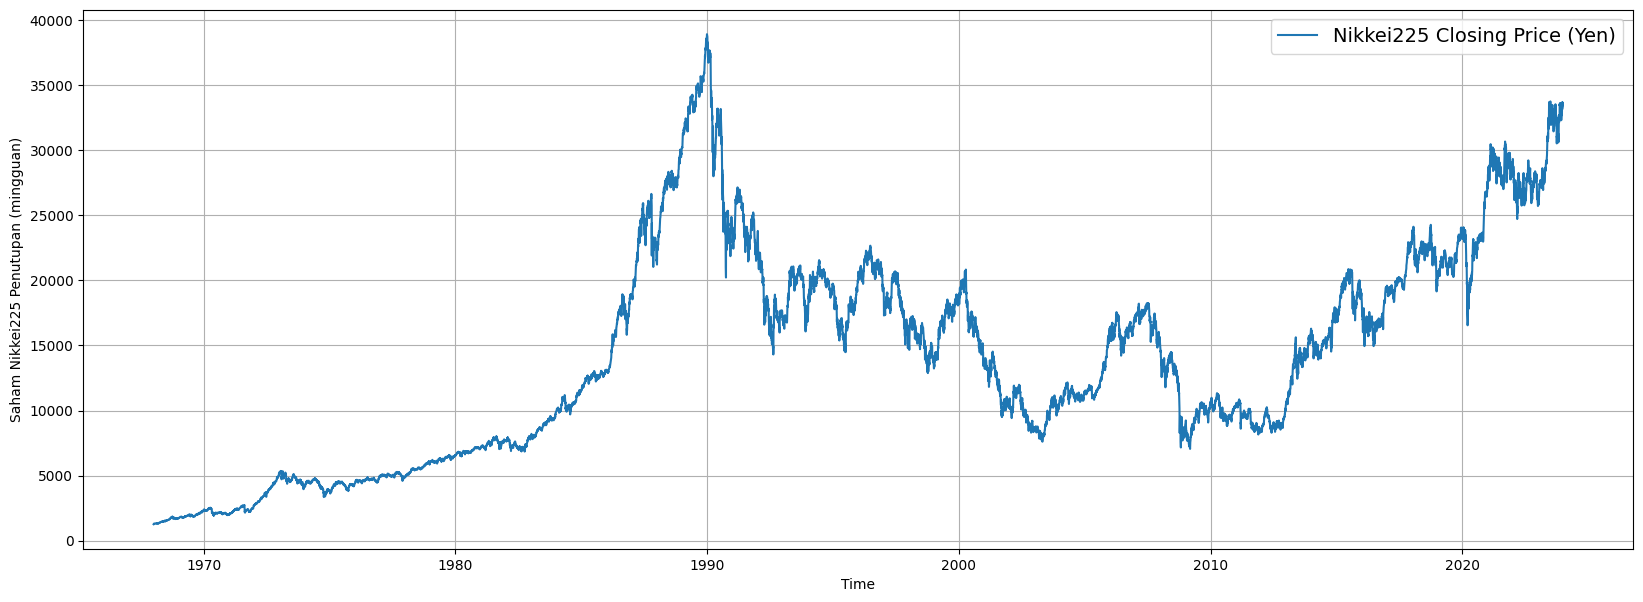

In [30]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)")


Visualisasi data discount rate

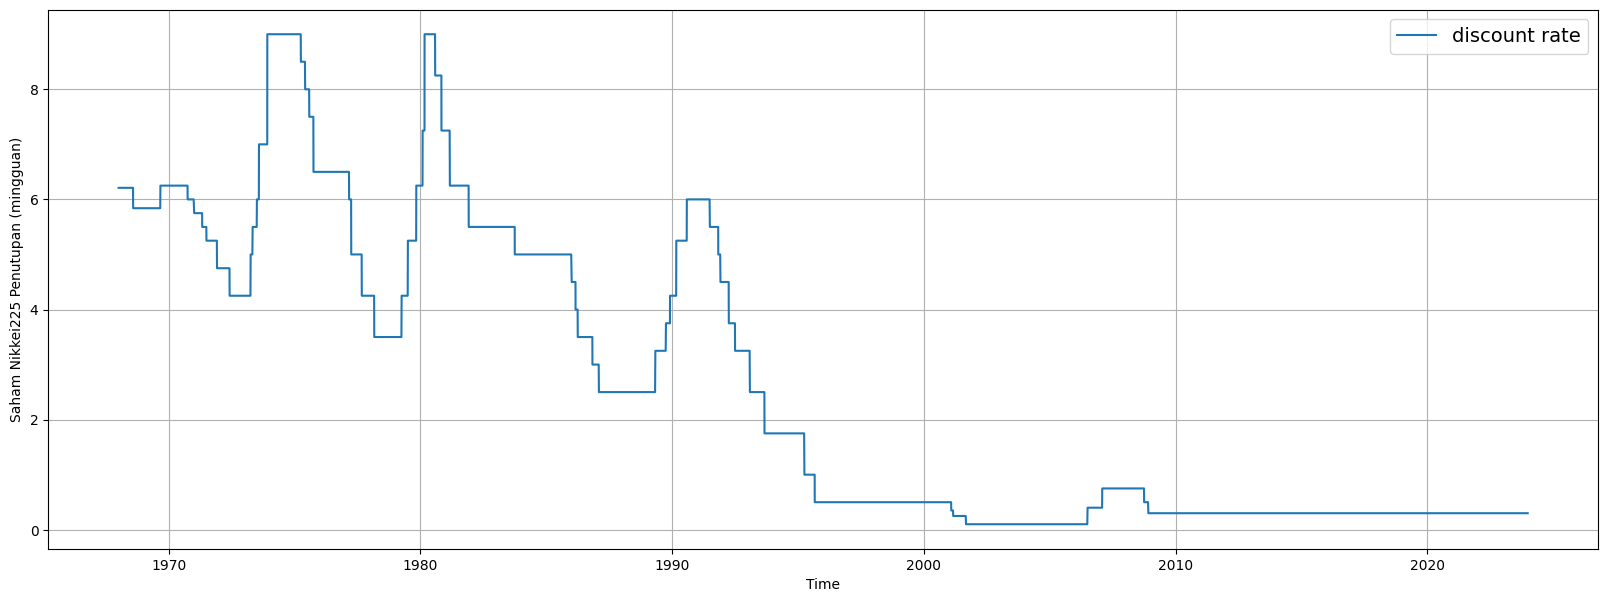

In [31]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate")


Visualisasi data money supply

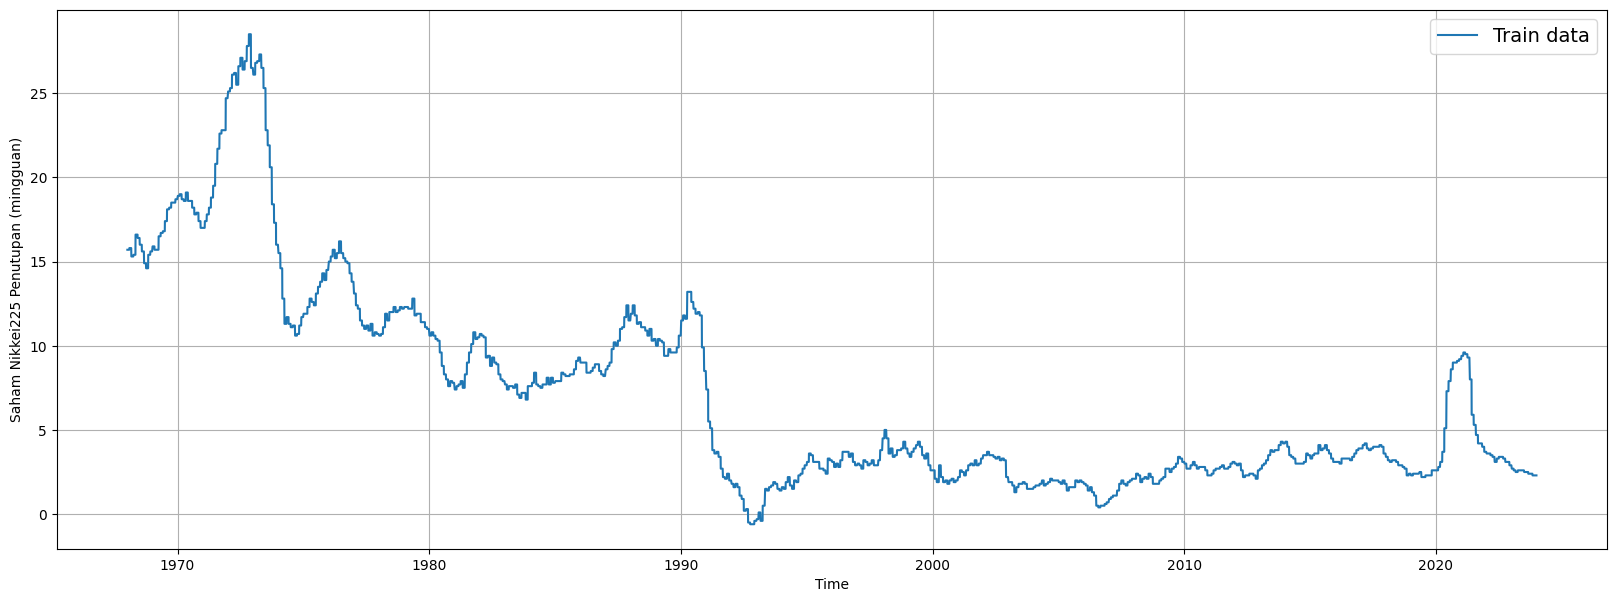

In [32]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['money_stock'].tolist(), format = "-", label = "Train data")


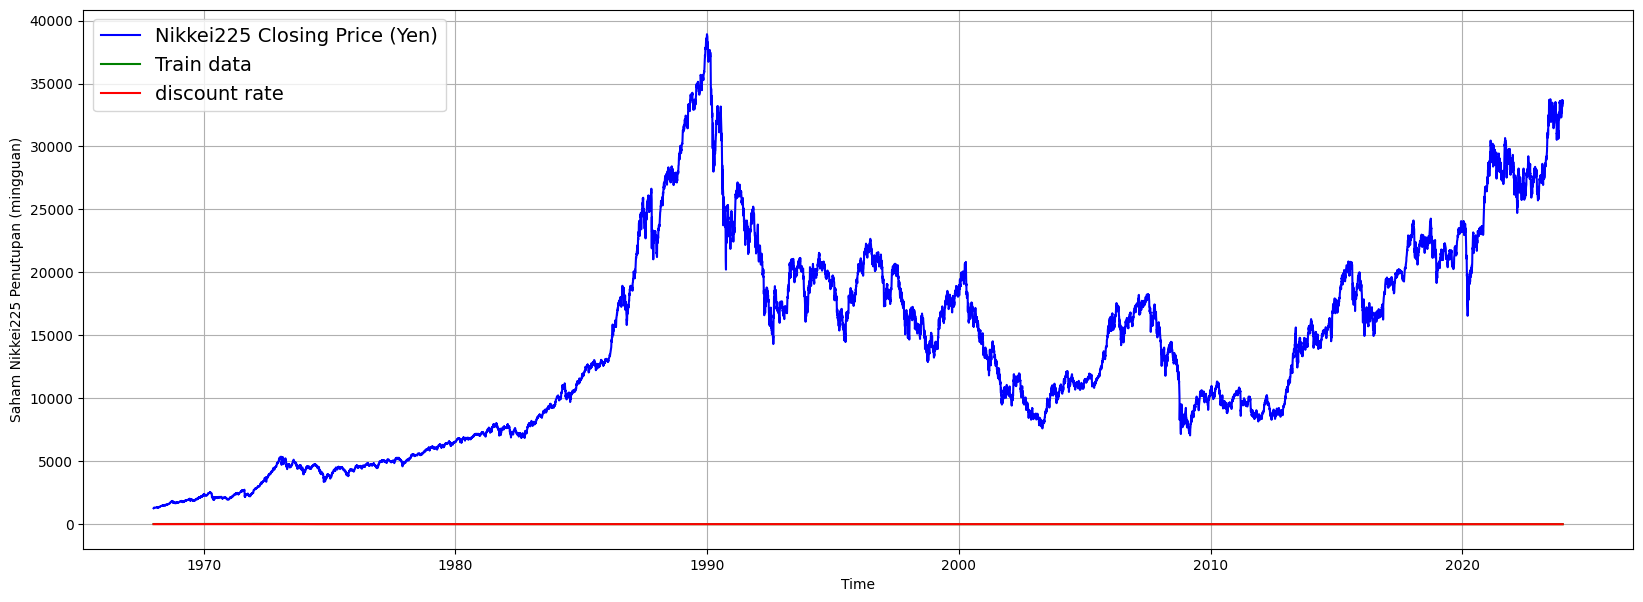

In [33]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['Closing Price (Yen)'].tolist(), format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['money_stock'].tolist(), format = "-", label = "Train data", color ='g')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = nikkei225_close_multivariate_df['discount_rate'].tolist(), format = "-", label = "discount rate", color = 'r')


# Melakukan normalisasi dataset

In [34]:
# Langkah 1 : konversi setiap fitur menjadi 2D-array dengan konfigurasi : (jumlah sample, 1)


In [35]:

from sklearn.preprocessing import MinMaxScaler

# meinputkan data ke MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(nikkei225_close_multivariate_df)

MinMaxScaler()

In [36]:
# Melakukan normalization
scaler.transform(nikkei225_close_multivariate_df)

array([[0.00000000e+00, 5.60137457e-01, 6.86516854e-01],
       [4.27892992e-04, 5.60137457e-01, 6.86516854e-01],
       [3.85395861e-04, 5.60137457e-01, 6.86516854e-01],
       ...,
       [8.60964526e-01, 9.96563574e-02, 2.24719101e-02],
       [8.57202998e-01, 9.96563574e-02, 2.24719101e-02],
       [8.55198993e-01, 9.96563574e-02, 2.24719101e-02]])

membuat dataframe dengan nilai normalized

In [37]:
normalized_data  = scaler.transform(nikkei225_close_multivariate_df)
normalized_data


array([[0.00000000e+00, 5.60137457e-01, 6.86516854e-01],
       [4.27892992e-04, 5.60137457e-01, 6.86516854e-01],
       [3.85395861e-04, 5.60137457e-01, 6.86516854e-01],
       ...,
       [8.60964526e-01, 9.96563574e-02, 2.24719101e-02],
       [8.57202998e-01, 9.96563574e-02, 2.24719101e-02],
       [8.55198993e-01, 9.96563574e-02, 2.24719101e-02]])

In [38]:
print ("dataset_normalized.shape" , normalized_data.shape)

dataset_normalized.shape (14628, 3)


In [39]:
normalized_data[:,0].reshape(-1, 1)

array([[0.00000000e+00],
       [4.27892992e-04],
       [3.85395861e-04],
       ...,
       [8.60964526e-01],
       [8.57202998e-01],
       [8.55198993e-01]])

In [40]:
type(normalized_data[:,0].reshape(-1, 1))

numpy.ndarray

In [41]:
# konversi array menjadi bentuk dataframe
scaled_nikkei225_close_multivariate_df  = pd.DataFrame(normalized_data, columns=nikkei225_close_multivariate_df.columns)


In [42]:
scaled_nikkei225_close_multivariate_df

,Closing Price (Yen),money_stock,discount_rate
0,0.000000,0.560137,0.686517
1,0.000428,0.560137,0.686517
2,0.000385,0.560137,0.686517
3,0.000458,0.560137,0.686517
4,0.001054,0.560137,0.686517
...,...,...,...
14623,0.849618,0.099656,0.022472
14624,0.850994,0.099656,0.022472
14625,0.860965,0.099656,0.022472
14626,0.857203,0.099656,0.022472


LAtihan denormalisasi

In [43]:

# # Fit the scaler to your data
# scaler = MinMaxScaler()
# scaler.fit(nikkei225_close_multivariate_df[['discount_rate']])

# # Perform inverse normalization
# inverse_normalized_data = scaler.inverse_transform(scaled_nikkei225_close_multivariate_df[:, 2].reshape(-1, 1))

# print(inverse_normalized_data)

In [44]:
len(scaler.transform(nikkei225_close_multivariate_df ))

14628

In [45]:
scaler.transform(nikkei225_close_multivariate_df )[:,0].reshape(-1, 1)

array([[0.00000000e+00],
       [4.27892992e-04],
       [3.85395861e-04],
       ...,
       [8.60964526e-01],
       [8.57202998e-01],
       [8.55198993e-01]])

Visualisasi data yang di normalisasi

In [46]:
scaled_nikkei225_close_multivariate_df["money_stock"]

0        0.560137
1        0.560137
2        0.560137
3        0.560137
4        0.560137
           ...   
14623    0.099656
14624    0.099656
14625    0.099656
14626    0.099656
14627    0.099656
Name: money_stock, Length: 14628, dtype: float64

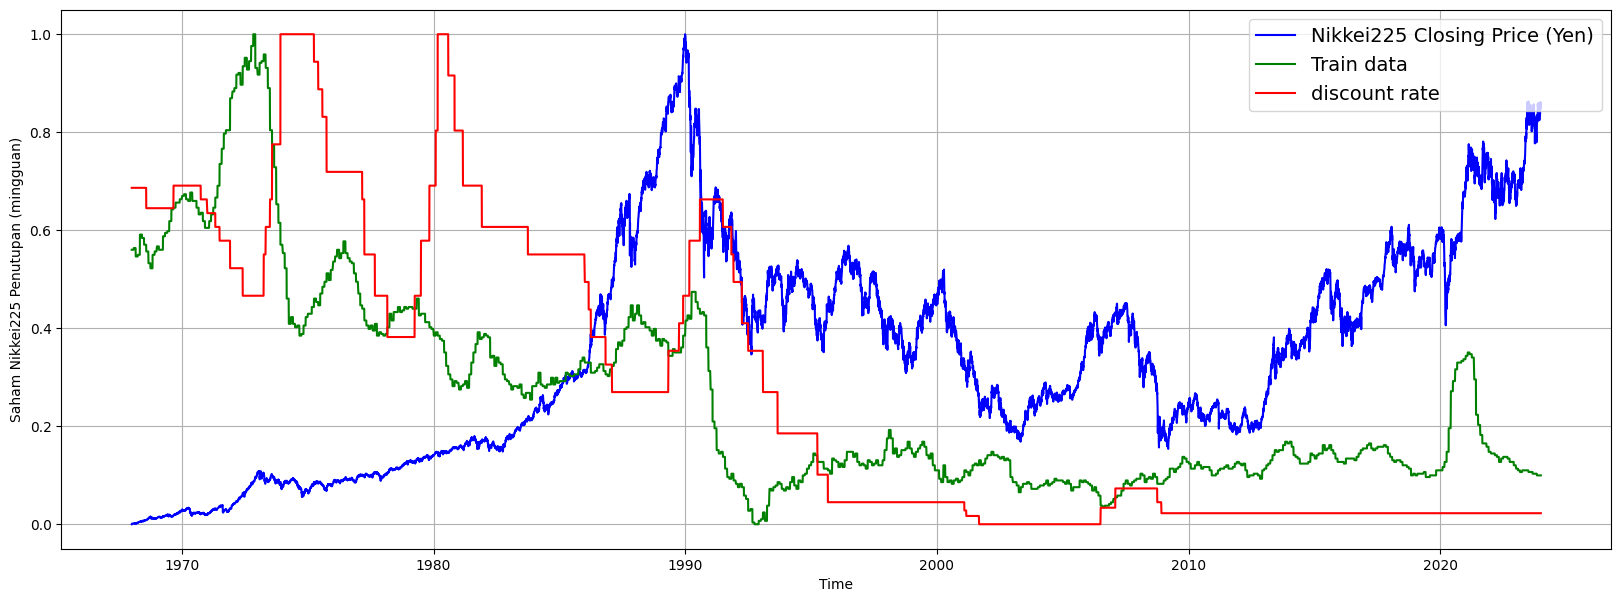

In [47]:

plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["Closing Price (Yen)"], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["money_stock"], format = "-", label = "Train data", color ='g')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = scaled_nikkei225_close_multivariate_df["discount_rate"], format = "-", label = "discount rate", color = 'r')


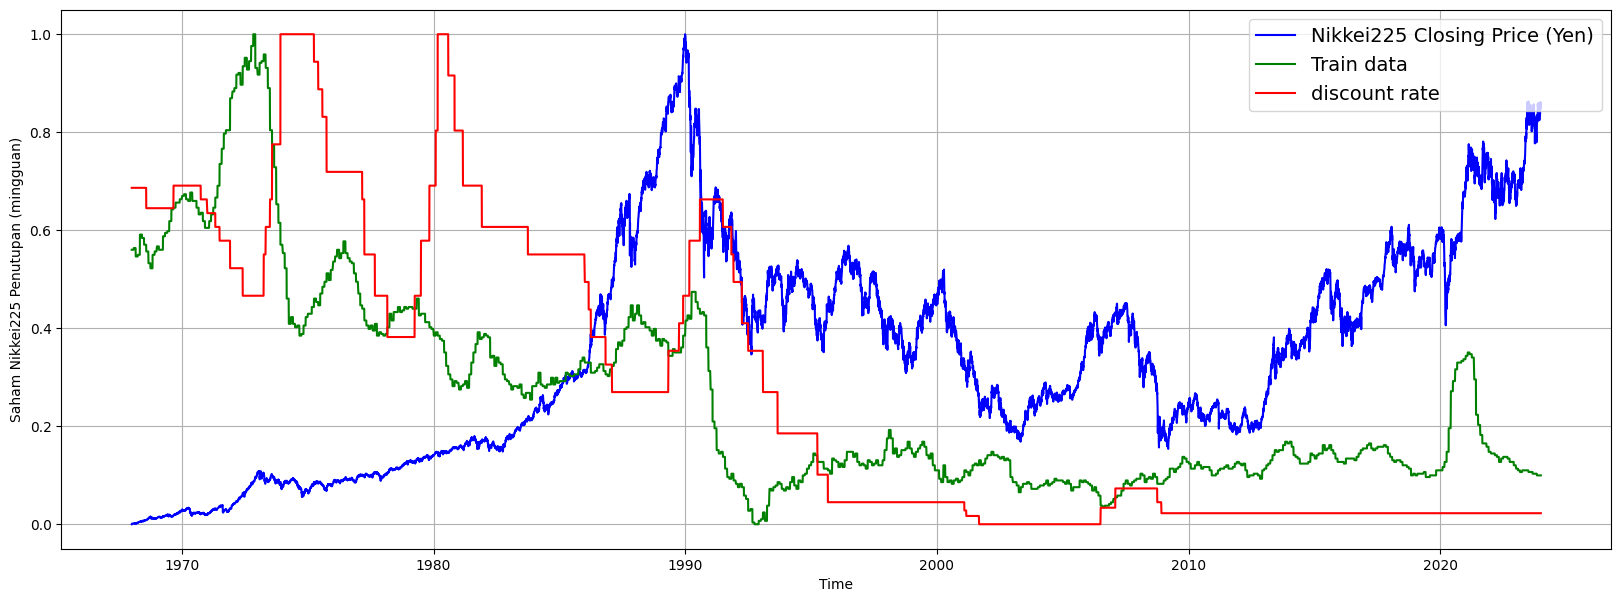

In [48]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,0], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,1], format = "-", label = "Train data", color ='g')
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,2], format = "-", label = "discount rate", color = 'r')



# menghitung korelasi antar time series

In [49]:
normalized_data[:,0].reshape(-1, 1)

array([[0.00000000e+00],
       [4.27892992e-04],
       [3.85395861e-04],
       ...,
       [8.60964526e-01],
       [8.57202998e-01],
       [8.55198993e-01]])

In [50]:
(normalized_data[:,0])

array([0.00000000e+00, 4.27892992e-04, 3.85395861e-04, ...,
       8.60964526e-01, 8.57202998e-01, 8.55198993e-01])

In [51]:
type(normalized_data[:,0])

numpy.ndarray

In [52]:
import numpy as np
# menghitung koefisien korelasi dengan numpy

corr_coef = np.corrcoef(normalized_data[:,0], normalized_data[:,1])
print("Correlation coefficient saham dengan mooney supply: \n", corr_coef)

corr_coef = np.corrcoef(normalized_data[:,0], normalized_data[:,2])
print("Correlation coefficient saham dengan discount rate: \n", corr_coef)

Correlation coefficient saham dengan mooney supply: 
 [[ 1.         -0.49744783]
 [-0.49744783  1.        ]]
Correlation coefficient saham dengan discount rate: 
 [[ 1.         -0.51308293]
 [-0.51308293  1.        ]]


In [53]:

# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_close_multivariate_df.corr(method = "pearson")
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                     Closing Price (Yen)  money_stock  discount_rate
Closing Price (Yen)             1.000000    -0.497448      -0.513083
money_stock                    -0.497448     1.000000       0.702302
discount_rate                  -0.513083     0.702302       1.000000


In [54]:
# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_close_multivariate_df.corr(method = "spearman")
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                     Closing Price (Yen)  money_stock  discount_rate
Closing Price (Yen)             1.000000    -0.496075      -0.499816
money_stock                    -0.496075     1.000000       0.708115
discount_rate                  -0.499816     0.708115       1.000000


In [55]:
# menghitung korelasi dengan pandas

corr_matrix = scaled_nikkei225_close_multivariate_df.corr(method = "kendall")
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                     Closing Price (Yen)  money_stock  discount_rate
Closing Price (Yen)             1.000000    -0.339676      -0.325313
money_stock                    -0.339676     1.000000       0.493086
discount_rate                  -0.325313     0.493086       1.000000


mungkin plotnya yang ini bisa di zoom supaya keliatan perbedaan data fluktuasi minigguan dan bulanannya

# Membuat dataset multivariate menjadi format sliding window dengan pendekatan multistep multivariate time series forecasting

In [56]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

SPLIT_SIZE = 0.9 # 80% data untuk train test 20% untuk test size

In [57]:
nikkei225_close_multivariate_df[:2]

,Closing Price (Yen),money_stock,discount_rate
Date,,,
1968-01-04,1266.27,15.7,6.21
1968-01-05,1282.38,15.7,6.21


In [58]:
scaled_nikkei225_close_multivariate_df[:2]

,Closing Price (Yen),money_stock,discount_rate
0,0.000000,0.560137,0.686517
1,0.000428,0.560137,0.686517


membuat window dan horizon multivariate

In [59]:
len(scaled_nikkei225_close_multivariate_df)

14628

In [60]:

# データ数
sample_size = len(scaled_nikkei225_close_multivariate_df)
# 予測に用いる期間
train_size = int(sample_size*SPLIT_SIZE)
test_size = sample_size - train_size

In [61]:
sample_size

14628

In [62]:
# データセットを作る関数

import numpy as np

def make_dataset(raw_data, WINDOW_SIZE=7, HORIZON = 1):
    _X = []
    _y = []

    for i in range(len(raw_data) - WINDOW_SIZE - HORIZON + 1):
        _X.append(raw_data[i : i + WINDOW_SIZE])
        _y.append(raw_data[i + WINDOW_SIZE : i + WINDOW_SIZE + HORIZON])
    _X = np.array(_X).reshape(len(_X), WINDOW_SIZE, 1)
    _y = np.array(_y).reshape(len(_y), HORIZON, 1)

    return _X, _y

In [63]:
from sklearn import preprocessing

columns = list(scaled_nikkei225_close_multivariate_df.columns)

# 最小0、最大1に正規化
Xs = []
for i in range(len(columns)):
    Xs.append((scaled_nikkei225_close_multivariate_df[columns[i]]))
Xs = np.array(Xs)

X_nikkei, y_nikkei = make_dataset(Xs[0], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)
X_moneyStock, y_moneyStock = make_dataset(Xs[1], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)
X_discRate, y_discRate = make_dataset(Xs[2], WINDOW_SIZE = WINDOW_SIZE, HORIZON = HORIZON)


# 多変量LSTM用に各データを結合
X_concat = np.concatenate([X_nikkei, X_moneyStock, X_discRate], axis=2)
y_concat = np.concatenate([y_nikkei, y_moneyStock, y_discRate], axis=2)

In [64]:
full_windows = X_concat
full_labels = y_concat

In [65]:
len(full_windows), len(full_labels)

(14621, 14621)

In [66]:
scaled_nikkei225_close_multivariate_df[:13]

,Closing Price (Yen),money_stock,discount_rate
0,0.000000,0.560137,0.686517
1,0.000428,0.560137,0.686517
2,0.000385,0.560137,0.686517
3,0.000458,0.560137,0.686517
4,0.001054,0.560137,0.686517
5,0.000978,0.560137,0.686517
6,0.001345,0.560137,0.686517
7,0.001280,0.560137,0.686517
8,0.001386,0.560137,0.686517
9,0.001294,0.560137,0.686517


In [67]:
print(full_windows[0]),
print(full_windows.shape)
print("\n")
print(full_labels[0])
print(full_labels.shape)

[[0.00000000e+00 5.60137457e-01 6.86516854e-01]
 [4.27892992e-04 5.60137457e-01 6.86516854e-01]
 [3.85395861e-04 5.60137457e-01 6.86516854e-01]
 [4.58437805e-04 5.60137457e-01 6.86516854e-01]
 [1.05366325e-03 5.60137457e-01 6.86516854e-01]
 [9.78496451e-04 5.60137457e-01 6.86516854e-01]
 [1.34450300e-03 5.60137457e-01 6.86516854e-01]]
(14621, 7, 3)


[[0.00128023 0.56013746 0.68651685]]
(14621, 1, 3)


In [68]:
print(full_windows[1]),
print(full_windows.shape)
print("\n")
print(full_labels[1])
print(full_labels.shape)

[[4.27892992e-04 5.60137457e-01 6.86516854e-01]
 [3.85395861e-04 5.60137457e-01 6.86516854e-01]
 [4.58437805e-04 5.60137457e-01 6.86516854e-01]
 [1.05366325e-03 5.60137457e-01 6.86516854e-01]
 [9.78496451e-04 5.60137457e-01 6.86516854e-01]
 [1.34450300e-03 5.60137457e-01 6.86516854e-01]
 [1.28022608e-03 5.60137457e-01 6.86516854e-01]]
(14621, 7, 3)


[[0.0013862  0.56013746 0.68651685]]
(14621, 1, 3)


format training atau test data pada **window/fitur** adalah **(jumlah sample, ukuran window, jumlah variable)**

In [69]:
full_windows.shape

(14621, 7, 3)

format training atau test data pada **label** adalah **(jumlah sample, jumlah variabel)**

In [70]:
full_labels.shape

(14621, 1, 3)

In [71]:
full_labels = np.squeeze(full_labels)
full_labels.shape

(14621, 3)

In [72]:
full_labels[:3]

array([[0.00128023, 0.56013746, 0.68651685],
       [0.0013862 , 0.56013746, 0.68651685],
       [0.00129377, 0.56013746, 0.68651685]])

Membagi data menjadi training dataset dan test data set. Pembagian data menjadi train dan test dengan train series split dimana Test dataset akan menggunakan data yang pseusdo future (data yang seakan2 berperan dari masa depan).

In [73]:
(sample_size), (train_size), (test_size)

(14628, 13165, 1463)

In [74]:
train_size

13165

In [75]:
train_windows = full_windows[:train_size]
test_windows = full_windows[train_size:]

train_labels = full_labels[:train_size]
test_labels = full_labels[train_size:]

In [76]:
len(full_windows), len(train_windows), len(test_windows)

(14621, 13165, 1456)

In [77]:
"windows", train_windows[12393:], "Labels",train_labels[12393:]

('windows',
 array([[[0.41206972, 0.1443299 , 0.02247191],
         [0.42119544, 0.1443299 , 0.02247191],
         [0.42313278, 0.1443299 , 0.02247191],
         ...,
         [0.43093579, 0.1443299 , 0.02247191],
         [0.4172031 , 0.1443299 , 0.02247191],
         [0.42703747, 0.1443299 , 0.02247191]],
 
        [[0.42119544, 0.1443299 , 0.02247191],
         [0.42313278, 0.1443299 , 0.02247191],
         [0.42833178, 0.1443299 , 0.02247191],
         ...,
         [0.4172031 , 0.1443299 , 0.02247191],
         [0.42703747, 0.1443299 , 0.02247191],
         [0.4255684 , 0.1443299 , 0.02247191]],
 
        [[0.42313278, 0.1443299 , 0.02247191],
         [0.42833178, 0.1443299 , 0.02247191],
         [0.43093579, 0.1443299 , 0.02247191],
         ...,
         [0.42703747, 0.1443299 , 0.02247191],
         [0.4255684 , 0.1443299 , 0.02247191],
         [0.42589005, 0.1443299 , 0.02247191]],
 
        ...,
 
        [[0.57152559, 0.1443299 , 0.02247191],
         [0.57101988, 0.14432

In [78]:
"windows", test_windows[:2], "Labels",test_labels[:2]

('windows',
 array([[[0.59624166, 0.13745704, 0.02247191],
         [0.59983957, 0.13745704, 0.02247191],
         [0.59819839, 0.13745704, 0.02247191],
         [0.59613276, 0.13745704, 0.02247191],
         [0.59462916, 0.13745704, 0.02247191],
         [0.59625096, 0.13745704, 0.02247191],
         [0.60254398, 0.13745704, 0.02247191]],
 
        [[0.59983957, 0.13745704, 0.02247191],
         [0.59819839, 0.13745704, 0.02247191],
         [0.59613276, 0.13745704, 0.02247191],
         [0.59462916, 0.13745704, 0.02247191],
         [0.59625096, 0.13745704, 0.02247191],
         [0.60254398, 0.13745704, 0.02247191],
         [0.60032696, 0.13745704, 0.02247191]]]),
 'Labels',
 array([[0.60032696, 0.13745704, 0.02247191],
        [0.59753888, 0.13745704, 0.02247191]]))

# LANJUT BIKIN FUNGSI EVALUASI DAN BIKIN MODEL

# Membuat fungsi untuk melakukan evaluasi regression problem

fungsi digunakan untuk menguji prediksi model dengan nilai sebenarnya dan menghasilkan nilai evaluasi masing-masing metrik

In [79]:
import tensorflow as tf


sehingga yang dilakukan dengan tf.reduce_mean adalah melakukan agregasi ke banyak nilai mae akibat dari horizon yang ukurannya lebih dari satu menjadi satu single value seperti yang dilakukan tensorflow

tf.reduce_mean mampu menghasilkan satu nilai mae yang sudah direratakan dan hasilnya sama dengan yang dihitung dari model saat evaluasi metrik MAE-nya dengan .evaluate, menghasilkan nilai MAE yang sama-sama 892.1709

In [80]:
def evaluate_preds(y_true, y_pred):
  #Pastikan data yang diproses dengan library tensorflow bertipe float32
  y_true = tf.cast(y_true, dtype = tf.float32) #karena metrik evaluasi dari library tensorflow bisa
  y_pred = tf.cast(y_pred, dtype = tf.float32) #memunculkan error jika tipe bukan float32

  y_true = tf.squeeze(y_true)
  y_pred = tf.squeeze(y_pred)

  # menghitung metrik evaluasi regression problem
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  # mape akan digunakan, yang disarankan jangan digunakan adalah sMAPE
  #mase = mean_absolute_scaled_error(y_true, y_pred) #tidak digunakan

  # kalkulasi nilai R-square
  from sklearn.metrics import r2_score
  Rsquare = r2_score(y_true, y_pred)

  # memperhitungkan berbagai ukuran metrics
  # (artinya untuk horizon yang lebih besar akan menghasilkan metrics (ex: MAE) yang berukuran dimensi lebih besar,
  # sehingga perlu di lakukan tf.reduce_mean lebih lanjut supaya menghasilkan single value metrics)

  # Calculate various metrics
  # (meaning for larger horizon will produce metrics (ex: MAE) with larger dimension,
  # so tf.reduce_mean is needed to produce single value metrics)
  if mae.ndim>0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    #mase = tf.reduce_mean(mase)

  return {"mae" : mae.numpy(), #ditampilkan dalam bentuk numpy bukan tensor
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          #"mase" : mase.numpy(),
          "R-square" : Rsquare}


# membuat modelling checkpoint

karena model akan belajar terus menerus pada masing-masing epoch, diantara epoch-epoch tersebut dapat menghasilkan pembelajaran terbaik tidak hanya di eopch terakhir saja. Maka dari itu, epoch yang memiliki hasil terbaik akan di simpan selama training.  

Dengan menyimpan epoch yang terbaik, model yang akan dibuat adalah model yang terbaik dan dapat dibandingkan dengan model terbaik lainnya secara adil.

Untuk membuat modelling checkpoint callback digunakan: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [117]:
# membuat modelling checkpoint

import os # membuat folder untuk menyimpan best model

# mmebuat function untuk implementasi ModelCheckpoint callback
def create_model_checkpoint(model_name, save_path = "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                                                    verbose = 1,
                                                                    save_best_only = True)

# Model 0 : Keras Encoder & Decoder

In [82]:
train_windows.shape

(13165, 7, 3)

In [83]:
train_windows[0:2]

array([[[0.00000000e+00, 5.60137457e-01, 6.86516854e-01],
        [4.27892992e-04, 5.60137457e-01, 6.86516854e-01],
        [3.85395861e-04, 5.60137457e-01, 6.86516854e-01],
        [4.58437805e-04, 5.60137457e-01, 6.86516854e-01],
        [1.05366325e-03, 5.60137457e-01, 6.86516854e-01],
        [9.78496451e-04, 5.60137457e-01, 6.86516854e-01],
        [1.34450300e-03, 5.60137457e-01, 6.86516854e-01]],

       [[4.27892992e-04, 5.60137457e-01, 6.86516854e-01],
        [3.85395861e-04, 5.60137457e-01, 6.86516854e-01],
        [4.58437805e-04, 5.60137457e-01, 6.86516854e-01],
        [1.05366325e-03, 5.60137457e-01, 6.86516854e-01],
        [9.78496451e-04, 5.60137457e-01, 6.86516854e-01],
        [1.34450300e-03, 5.60137457e-01, 6.86516854e-01],
        [1.28022608e-03, 5.60137457e-01, 6.86516854e-01]]])

In [84]:
train_labels[0:2]

array([[0.00128023, 0.56013746, 0.68651685],
       [0.0013862 , 0.56013746, 0.68651685]])

In [85]:
train_labels.shape

(13165, 3)

In [86]:
test_windows.shape

(1456, 7, 3)

In [87]:
test_labels.shape

(1456, 3)

In [88]:
# keterangan jumlah feature
test_labels.shape[1]

3

Mulai membuat model Keras

In [89]:
import tensorflow as tf
from tensorflow.keras import layers

In [90]:
from keras import Model
from keras.layers import Input, Dense, Bidirectional, LSTM, RepeatVector, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from numpy import array, hstack
import numpy as np

In [91]:
def define_model():
  tf.random.set_seed(42)
  #define the input data shape
  encoder_inputs = Input(shape = (WINDOW_SIZE, train_windows.shape[2]))

  # use single BILSTM as Encoder
  #Here we can use bigger network also like one BILSTM with reutrn_sequences = True and
  # Other BILSTM with return_sequences = False
  # OR CNN, CNN-LSTM, and so many
  encoder = (LSTM(units = 128, return_sequences=True))(encoder_inputs)

  # apply RepeatVector to get the result for multiple time steps (here out output_timesteps = 2)
  # for this step decoder operation start
  #repeat_output = RepeatVector(output_timesteps)(encoder)
  decoder = (LSTM(units = 64, return_sequences=False))(encoder)

  # use TimeDistributed layer to get multiple output features
  out = Dense(test_labels.shape[1])(decoder)
  #out = TimeDistributed(Dense(output_features))(decoder)
  model = Model(encoder_inputs , out)

  # compile the model
  model.compile(loss = 'mae', optimizer = 'adam', metrics=[tf.keras.metrics.MeanAbsoluteError()])
  model.summary()
  return model

In [92]:
# call the model
model_0 = define_model()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 3)]            0         
                                                                 
 lstm (LSTM)                 (None, 7, 128)            67584     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 117187 (457.76 KB)
Trainable params: 117187 (457.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
# fit the model
model_0.fit(train_windows,
            train_labels,
            epochs = 3,
            batch_size=128,
            verbose = 1,
            validation_data = (test_windows, test_labels)
            )



Epoch 1/3
103/103 [==============================] - 10s 50ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098
Epoch 2/3
103/103 [==============================] - 6s 54ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068
Epoch 3/3
103/103 [==============================] - 5s 46ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084


In [94]:
# mengevaluasi model 6 dari epochs terakhir
model_0.evaluate(test_windows, test_labels)

46/46 [==============================] - 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084


[0.008432040922343731, 0.008432040922343731]

In [95]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_0_preds = (model_0.predict(test_windows))
model_0_preds



46/46 [==============================] - 1s 7ms/step


array([[0.600889  , 0.1331335 , 0.03002284],
       [0.60139674, 0.13316947, 0.03003487],
       [0.6012729 , 0.13326108, 0.02999381],
       ...,
       [0.85100585, 0.0989233 , 0.0409808 ],
       [0.8538344 , 0.09873428, 0.04123087],
       [0.8549401 , 0.09880145, 0.04128025]], dtype=float32)

In [96]:
model_0_preds[:,0]

array([0.600889  , 0.60139674, 0.6012729 , ..., 0.85100585, 0.8538344 ,
       0.8549401 ], dtype=float32)

In [97]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_0_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_0_preds)

model_0_results

{'mae': 0.008432041,
 'mse': 0.00013338003,
 'rmse': 0.009961962,
 'mape': 15.542572,
 'R-square': -269903602.3206567}

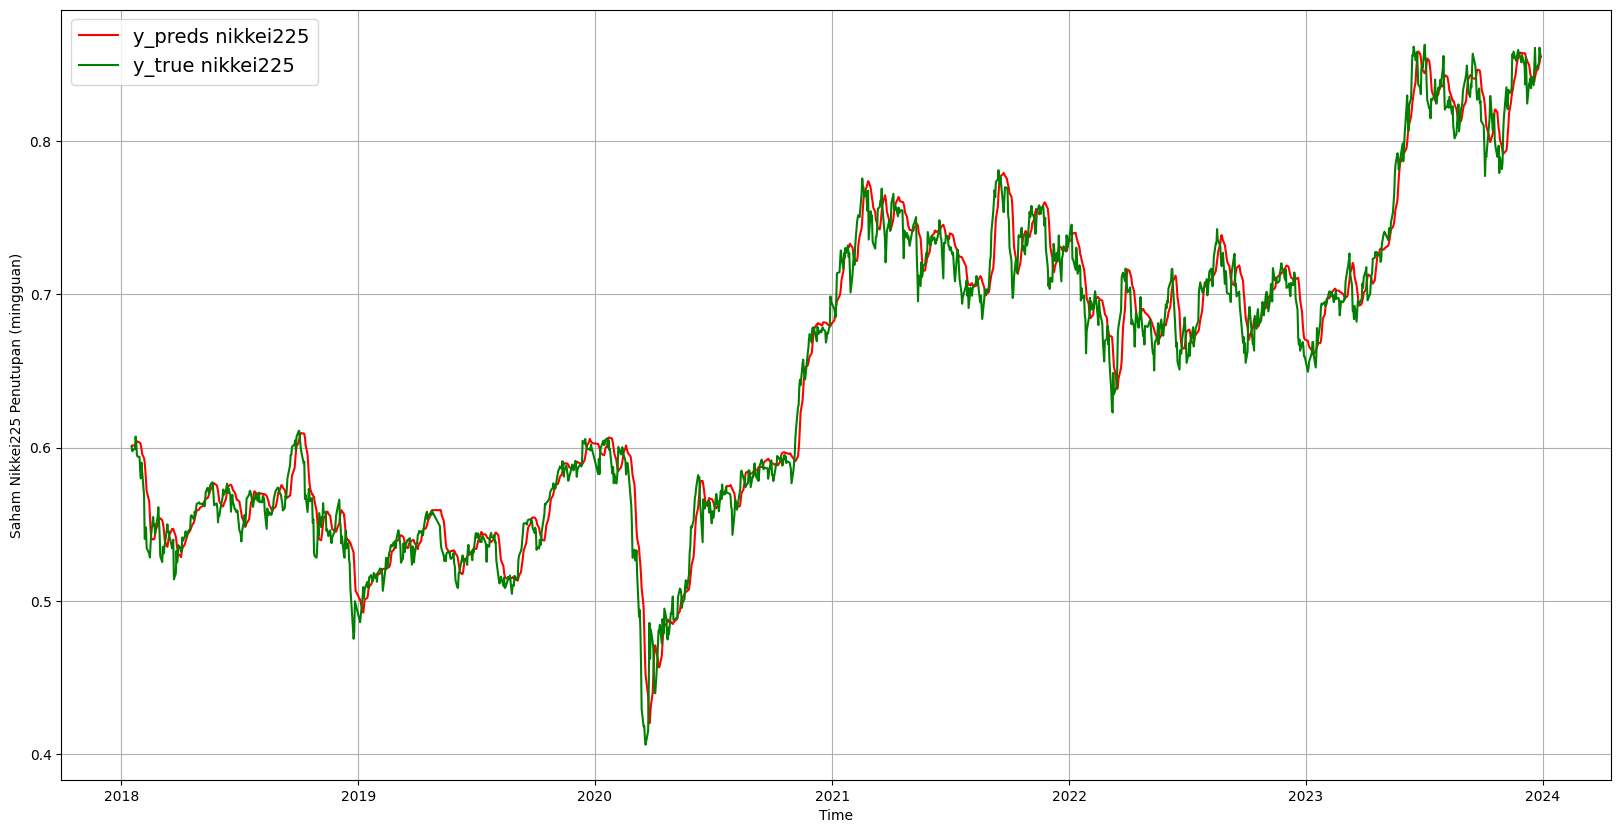

In [98]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_0_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Model 1: Conv1D

In [99]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.3 MB/s eta 0:00:00


In [100]:
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch


<ipython-input-100-b420bea64af7>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [101]:
# import library untuk mmebuat model

import tensorflow as tf
from tensorflow.keras import layers

In [102]:
train_windows.shape

(13165, 7, 3)

In [103]:
train_labels.shape

(13165, 3)

In [104]:
test_windows.shape

(1456, 7, 3)

In [105]:
test_labels.shape

(1456, 3)

In [106]:
test_labels.shape[1]

3

## Tuner Builder

In [118]:
tf.random.set_seed(42)

#create Conv1D model
def model_Conv1D_multi_builder(hp):
  model_1 = tf.keras.models.Sequential([


      #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
      tf.keras.layers.Conv1D(filters = hp.Int('conv1D_n_filters', min_value=32, max_value=256, step=32),
                             kernel_size = hp.Int('conv1D_kernel_size', min_value=5, max_value=10, step=1),
                             strides = 1,
                             padding ="causal",
                             activation = "relu",
                             input_shape=[train_windows.shape[1], train_windows.shape[2]]),

      tf.keras.layers.GlobalMaxPooling1D(),  # Add GlobalMaxPooling1D layer
      tf.keras.layers.Dense(test_labels.shape[1])
      #filters adalah jumlah hidden unit dalam layers tersebut
      # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
      # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
  ], name = "model_1_conv1D_multivariate")

  #compile model 1
  model_1.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_1


In [119]:
import keras_tuner as kt

tuner_Conv1D_multi = kt.Hyperband(model_Conv1D_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='Conv1D_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/Conv1D_multivariate/tuner0.json


## Proses tuning


In [120]:
tuner_Conv1D_multi.search(train_windows, train_labels, epochs=10, validation_data=(test_windows, test_labels))

## Hasil parameter tuning terbaik

In [121]:
tuner_Conv1D_multi.get_best_hyperparameters(num_trials=1)[0]

In [122]:
# Get the optimal hyperparameters
best_hps=tuner_Conv1D_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
print('Best tune model Conv1D multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model Conv1D multivariate:
conv1D_n_filters: 192
conv1D_kernel_size: 7
learning_rate: 0.001


## Hasil parameter tuning 10 terbaik

In [123]:
tuning =['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps=tuner_Conv1D_multi.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/best_hyperparameter_models/hp_top10_Conv1D_multi.csv')
df_top10


,conv1D_n_filters,conv1D_kernel_size,learning_rate
0,192,7,0.0010
1,96,6,0.0100
2,96,7,0.0010
3,256,9,0.0010
4,256,8,0.0001
5,256,10,0.0010
6,256,10,0.0010
7,256,8,0.0001
8,128,7,0.0001
9,96,6,0.0100


## Mengimplementasikan hyperparameter terbaik ke model

In [124]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_1 = tuner_Conv1D_multi.hypermodel.build(best_hps)

## Melatih model

In [160]:
# fit
history = model_1.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 100,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
 97/103 [===========================>..] - ETA: 0s - loss: 0.0053
Epoch 1: val_loss improved from inf to 0.00476, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_1_conv1D_multivariate
103/103 [==============================] - 2s 12ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 2/100
100/103 [============================>.] - ETA: 0s - loss: 0.0039
Epoch 2: val_loss improved from 0.00476 to 0.00456, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_1_conv1D_multivariate
103/103 [==============================] - 2s 23ms/step - loss: 0.0039 - val_loss: 0.0046
Epoch 3/100
103/103 [==============================] - ETA: 0s - loss: 0.0038
Epoch 3: val_loss improved from 0.00456 to 0.00381, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_1_conv1D_multivariate
103/103 [==============================] - 2s 16ms/step - loss: 0.0038 - val_loss: 0.0038
Ep

In [161]:
model_1.summary()

Model: "model_1_conv1D_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 192)            4224      
                                                                 
 global_max_pooling1d (Glob  (None, 192)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 3)                 579       
                                                                 
Total params: 4803 (18.76 KB)
Trainable params: 4803 (18.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


visualisasi loss setiap epoch

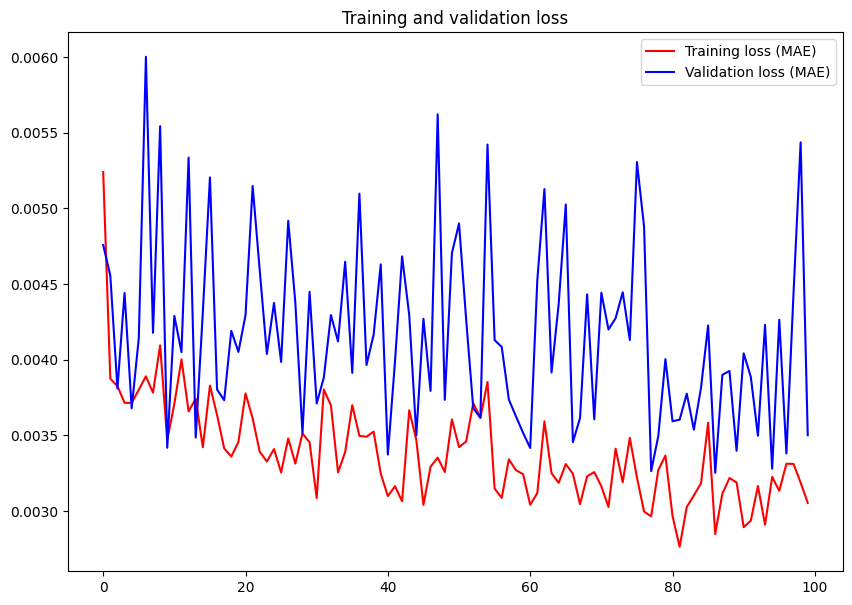

In [164]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.legend(loc=0)



# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_loss_visualization/loss_Conv1D_multi.png')

In [129]:
# mengevaluasi model 6 dari epochs terakhir
model_1.evaluate(test_windows, test_labels)

46/46 [==============================] - 0s 2ms/step - loss: 0.0034


0.00339197413995862

In [130]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_1 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_1_conv1D_multivariate")
model_1.evaluate(test_windows, test_labels)


46/46 [==============================] - 0s 3ms/step - loss: 0.0034


0.00339197413995862

In [131]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_1_preds = tf.squeeze(model_1.predict(test_windows))
model_1_preds



46/46 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(1456, 3), dtype=float32, numpy=
array([[0.6019692 , 0.13617888, 0.02291826],
       [0.6027343 , 0.13647011, 0.02292606],
       [0.6020258 , 0.1364554 , 0.02307998],
       ...,
       [0.84764946, 0.10337023, 0.021567  ],
       [0.8541324 , 0.10306918, 0.02123659],
       [0.85565776, 0.10367785, 0.02174259]], dtype=float32)>

In [132]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_1_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_1_preds)

model_1_results

{'mae': 0.0033919746,
 'mse': 4.3214943e-05,
 'rmse': 0.004786048,
 'mape': 1.8306364,
 'R-square': -1837953.4205408643}

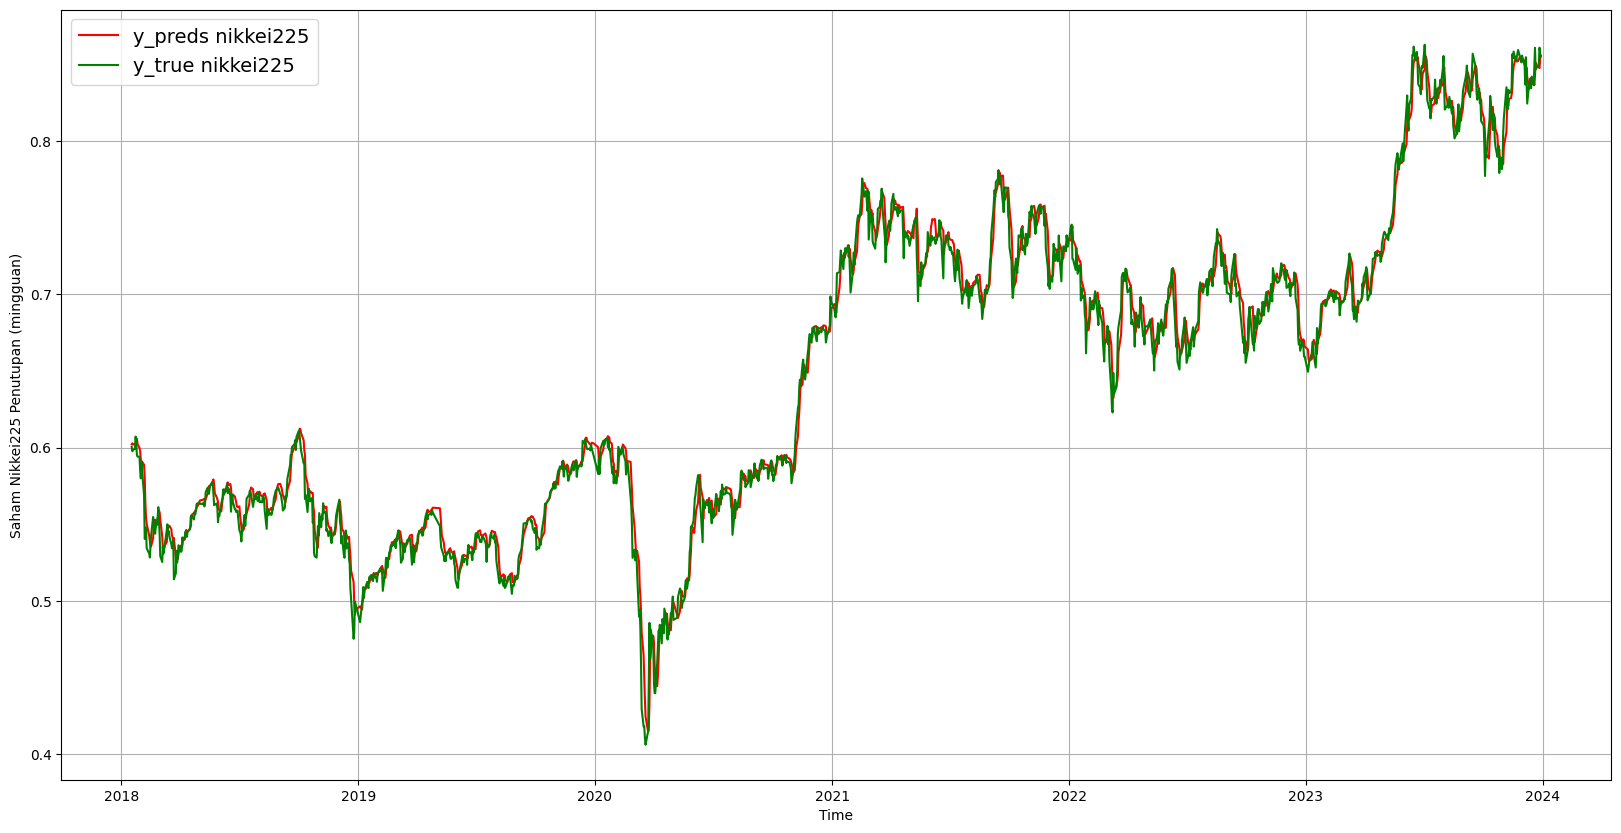

In [133]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_1_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


simpan model trained ke bentuk .h5

In [134]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_1, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_1_Conv1D_multivariate.h5")

<ipython-input-134-d1e0283355e9>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_1, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_1_Conv1D_multivariate.h5")


In [135]:
from tensorflow.keras.models import load_model

# Load the saved model
model_1 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_1_Conv1D_multivariate.h5")

# Model 2 : LSTM

In [136]:
train_windows.shape[2]

3

## Tuner Builder

In [140]:
tf.random.set_seed(42)
# membuat model LSTM dengan hyperparameter tuning

def model_LSTM_multi_builder(hp):
  model_2 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units', min_value=32, max_value=256, step=32),
                               input_shape=(train_windows.shape[1], train_windows.shape[2]),
                               return_sequences = False,
                               activation = "relu"),

          #tf.keras.layers.Dropout(0.2),
          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(test_labels.shape[1])
          ], name = "model_2_LSTM_multivariate")



  #compile model 2
  model_2.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_2

In [141]:
import keras_tuner as kt

tuner_LSTM_multi = kt.Hyperband(model_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='LSTM_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/LSTM_multivariate/tuner0.json


## Proses tuning


In [139]:
tuner_LSTM_multi.search(train_windows, train_labels, epochs=10, validation_data=(test_windows, test_labels))

## Hasil parameter tuning terbaik

In [142]:
# Get the optimal hyperparameters
best_hps=tuner_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units', 'learning_rate']
print('Best tune model LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model LSTM multivariate:
lstm_n_units: 128
learning_rate: 0.01


## Hasil parameter tuning 10 terbaik

In [143]:
tuning =['lstm_n_units', 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps=tuner_LSTM_multi.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/best_hyperparameter_models/hp_top10_LSTM_multi.csv')
df_top10


,lstm_n_units,learning_rate
0,128,0.0100
1,192,0.0100
2,128,0.0100
3,192,0.0100
4,128,0.0100
5,256,0.0100
6,96,0.0010
7,192,0.0010
8,192,0.0001
9,192,0.0001


## Mengimplementasikan hyperparameter terbaik ke model

In [144]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_2 = tuner_LSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [145]:

# fit
history = model_2.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 100,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/100
101/103 [============================>.] - ETA: 0s - loss: 0.0372
Epoch 1: val_loss improved from inf to 0.03072, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_2_LSTM_multivariate
103/103 [==============================] - 6s 44ms/step - loss: 0.0367 - val_loss: 0.0307
Epoch 2/100
102/103 [============================>.] - ETA: 0s - loss: 0.0132
Epoch 2: val_loss improved from 0.03072 to 0.01010, saving model to /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_2_LSTM_multivariate
103/103 [==============================] - 5s 51ms/step - loss: 0.0132 - val_loss: 0.0101
Epoch 3/100
101/103 [============================>.] - ETA: 0s - loss: 0.0117
Epoch 3: val_loss did not improve from 0.01010
103/103 [==============================] - 2s 23ms/step - loss: 0.0116 - val_loss: 0.0138
Epoch 4/100
102/103 [============================>.] - ETA: 0s - loss: 0.0102
Epoch 4: val_loss did not improve from 0.01010


In [146]:
model_2.summary()

Model: "model_2_LSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               67584     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 67971 (265.51 KB)
Trainable params: 67971 (265.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


visualisasi loss setiap epoch

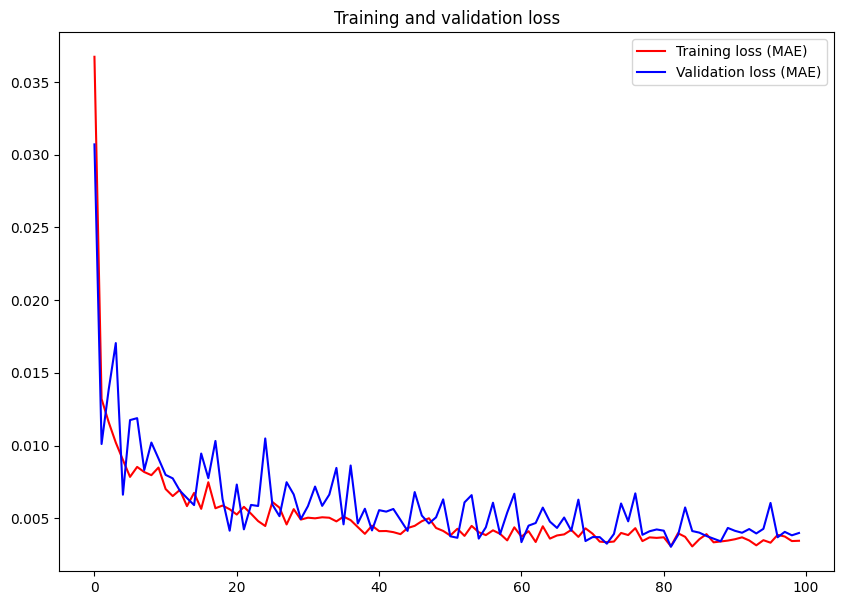

In [150]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.legend(loc=0)


# Save the plot to an image file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_loss_visualization/loss_LSTM_multi.png')

In [151]:
# mengevaluasi model 6 dari epochs terakhir
model_2.evaluate(test_windows, test_labels)

46/46 [==============================] - 0s 6ms/step - loss: 0.0030


0.003034686902537942

In [152]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_2 = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/model_best_epoch/model_2_LSTM_multivariate")
model_2.evaluate(test_windows, test_labels)


46/46 [==============================] - 0s 5ms/step - loss: 0.0030


0.003034686902537942

In [153]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_2_preds = tf.squeeze(model_2.predict(test_windows))
model_2_preds



46/46 [==============================] - 0s 5ms/step


<tf.Tensor: shape=(1456, 3), dtype=float32, numpy=
array([[0.6014012 , 0.13716467, 0.02219078],
       [0.59913826, 0.13664068, 0.02200661],
       [0.5966035 , 0.1366064 , 0.02196061],
       ...,
       [0.84452724, 0.10337082, 0.02383102],
       [0.8544531 , 0.10418517, 0.0242143 ],
       [0.84945047, 0.10298546, 0.02365445]], dtype=float32)>

In [154]:
model_2_preds[:,2]

<tf.Tensor: shape=(1456,), dtype=float32, numpy=
array([0.02219078, 0.02200661, 0.02196061, ..., 0.02383102, 0.0242143 ,
       0.02365445], dtype=float32)>

In [155]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_2_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_2_preds)

model_2_results

{'mae': 0.003034687,
 'mse': 3.0930736e-05,
 'rmse': 0.004248399,
 'mape': 1.6177301,
 'R-square': -1727212.3001985091}

In [156]:
tf.squeeze(test_labels[:,0])

<tf.Tensor: shape=(1456,), dtype=float64, numpy=
array([0.60032696, 0.59753888, 0.59872588, ..., 0.86096453, 0.857203  ,
       0.85519899])>

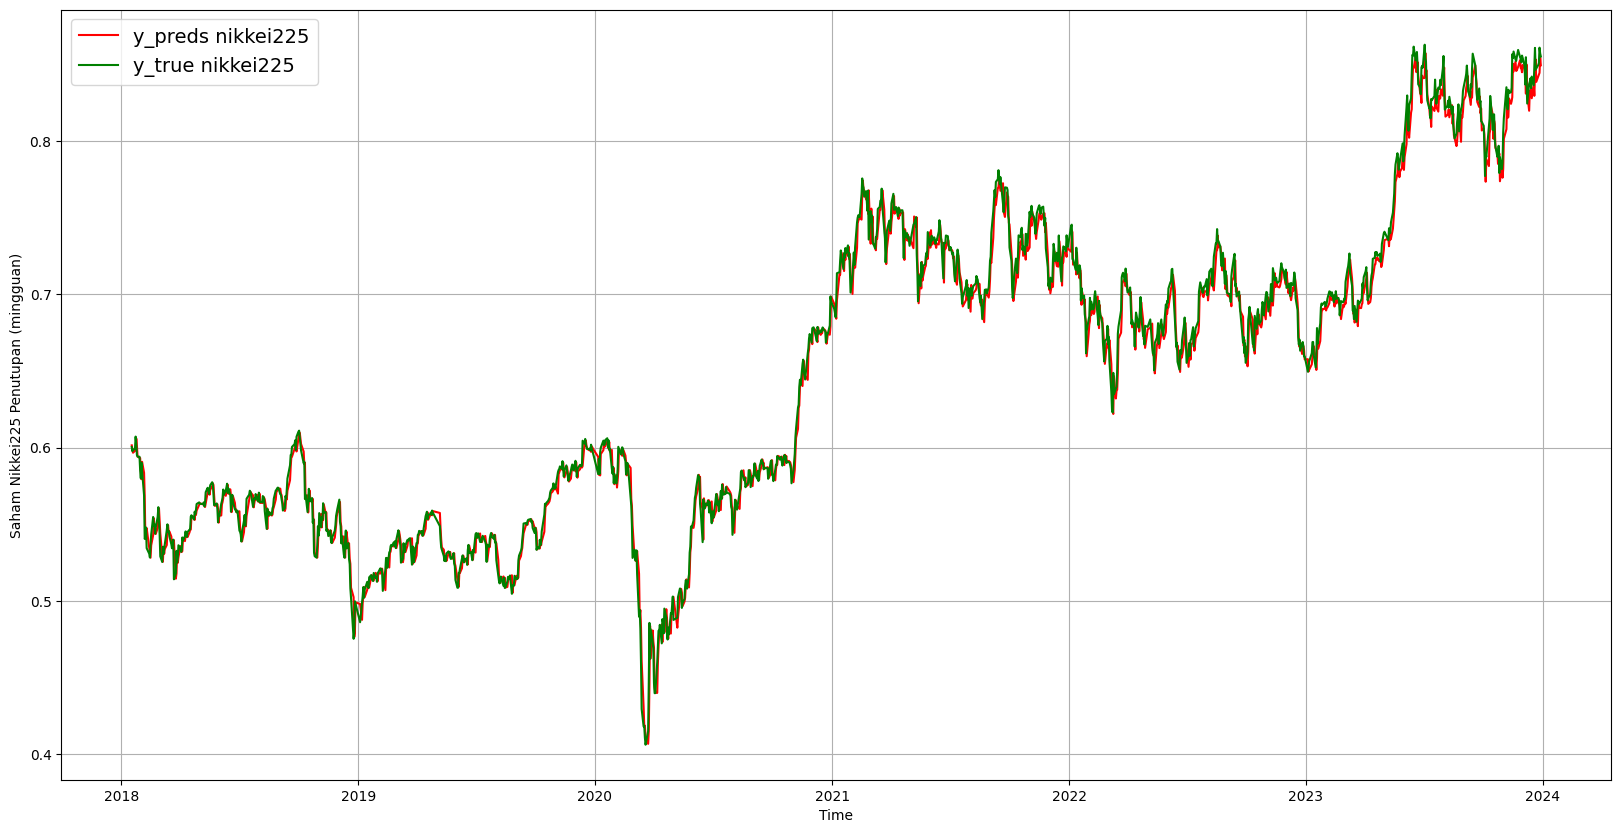

In [157]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_2_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


simpan model trained ke bentuk .h5

In [158]:
from tensorflow.keras.models import save_model

# menyimpan model menjadi .h5 file
save_model(model_2, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_2_LSTM_multivariate.h5")

<ipython-input-158-4fd07f688f98>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_2, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_2_LSTM_multivariate.h5")


In [159]:
from tensorflow.keras.models import load_model

# Load the saved model
model_2 = load_model("/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_2_LSTM_multivariate.h5")

# Model 3 : Stacked LSTM

In [143]:
train_windows.shape[2]

3

## Tuner Builder

In [144]:
tf.random.set_seed(42)

# model stacked LSTM dengan hyperparameter tuning

def model_stacked_LSTM_multi_builder(hp):
  model_3 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units =  hp.Int('lstm_n_units_1', min_value=32, max_value=256, step=32),
                               input_shape=(train_windows.shape[1], train_windows.shape[2]),
                               return_sequences = True,
                               activation = "relu"),

          #tf.keras.layers.Dropout(0.2, seed=42),
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units_2', min_value=32, max_value=256, step=32),
                               return_sequences = False,
                               activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(test_labels.shape[1])
          ], name = "model_3_stackedLSTM_multivariate")



  #compile model 2
  model_3.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_3

In [145]:
import keras_tuner as kt

tuner_stackedLSTM_multi = kt.Hyperband(model_stacked_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='stackedLSTM_multivariate')

Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/stackedLSTM_multivariate/tuner0.json


## Proses tuning


In [146]:
tuner_stackedLSTM_multi.search(train_windows, train_labels, epochs=10, validation_data=(test_windows, test_labels))

## Hasil parameter tuning terbaik

In [147]:
# Get the optimal hyperparameters
best_hps=tuner_stackedLSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units_1', "lstm_n_units_2", 'learning_rate']
print('Best tune model stacked LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model stacked LSTM multivariate:
lstm_n_units_1: 256
lstm_n_units_2: 224
learning_rate: 0.0001


## Hasil parameter tuning 10 terbaik

In [149]:
tuning = ['lstm_n_units_1', "lstm_n_units_2", 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps=tuner_stackedLSTM_multi.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('hp_top10_Stacked_LSTM_multi.csv')
df_top10


,lstm_n_units_1,lstm_n_units_2,learning_rate
0,256,224,0.0001
1,128,224,0.0010
2,256,224,0.0001
3,224,256,0.0001
4,128,128,0.0010
5,96,256,0.0001
6,32,64,0.0100
7,128,224,0.0010
8,224,256,0.0001
9,96,256,0.0001


## copy csv best 10 hyperparameter ke drive

In [150]:
import shutil
shutil.copy('/content/hp_top10_Stacked_LSTM_multi.csv', '/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/best_hyperparameter_models')

'/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/best_hyperparameter_models/hp_top10_Stacked_LSTM_multi.csv'

In [151]:
tuner_stackedLSTM_multi.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/stackedLSTM_multivariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0024 summary
Hyperparameters:
lstm_n_units_1: 256
lstm_n_units_2: 224
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0022
Score: 0.00696186488494277

Trial 0016 summary
Hyperparameters:
lstm_n_units_1: 128
lstm_n_units_2: 224
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0014
Score: 0.007076599635183811

Trial 0022 summary
Hyperparameters:
lstm_n_units_1: 256
lstm_n_units_2: 224
learning_rate: 0.0001
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.007653541397303343

Trial 0017 summary
Hyperparameters:
lstm_n_units_1: 224
lstm_n_units_2: 256
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/tri

## Mengimplementasikan hyperparameter terbaik ke model

In [152]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_3 = tuner_stackedLSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [153]:

# fit
history = model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 100,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

Epoch 1/100
103/103 [==============================] - ETA: 0s - loss: 0.1839
Epoch 1: val_loss improved from inf to 0.04471, saving model to model_experiments/model_3_stackedLSTM_multivariate
103/103 [==============================] - 24s 191ms/step - loss: 0.1839 - val_loss: 0.0447
Epoch 2/100
103/103 [==============================] - ETA: 0s - loss: 0.0273
Epoch 2: val_loss improved from 0.04471 to 0.01483, saving model to model_experiments/model_3_stackedLSTM_multivariate
103/103 [==============================] - 19s 190ms/step - loss: 0.0273 - val_loss: 0.0148
Epoch 3/100
103/103 [==============================] - ETA: 0s - loss: 0.0088
Epoch 3: val_loss improved from 0.01483 to 0.01121, saving model to model_experiments/model_3_stackedLSTM_multivariate
103/103 [==============================] - 21s 206ms/step - loss: 0.0088 - val_loss: 0.0112
Epoch 4/100
103/103 [==============================] - ETA: 0s - loss: 0.0061
Epoch 4: val_loss did not improve from 0.01121
103/103 [===

In [154]:
model_3.summary()

Model: "model_3_stackedLSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 256)            266240    
                                                                 
 lstm_4 (LSTM)               (None, 224)               430976    
                                                                 
 dense_3 (Dense)             (None, 3)                 675       
                                                                 
Total params: 697891 (2.66 MB)
Trainable params: 697891 (2.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


visualisasi loss setiap epoch

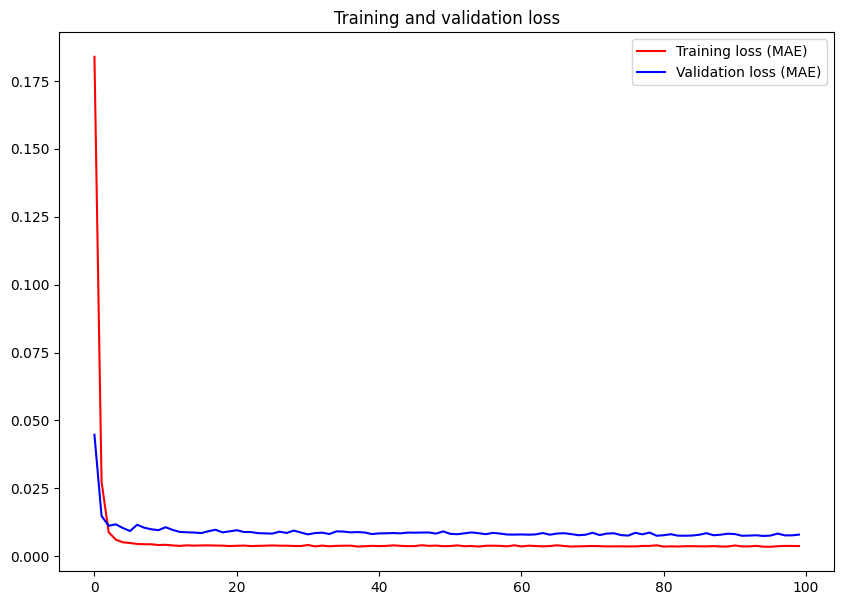

In [156]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.legend(loc=0)




In [155]:
# mengevaluasi model 6 dari epochs terakhir
model_3.evaluate(test_windows, test_labels)

46/46 [==============================] - 1s 22ms/step - loss: 0.0080


0.007960218004882336

In [157]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_3 = tf.keras.models.load_model("model_experiments/model_3_stackedLSTM_multivariate")
model_3.evaluate(test_windows, test_labels)


46/46 [==============================] - 1s 20ms/step - loss: 0.0075


0.0074618058279156685

In [158]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_3_preds = tf.squeeze(model_3.predict(test_windows))
model_3_preds



46/46 [==============================] - 1s 19ms/step


<tf.Tensor: shape=(1456, 3), dtype=float32, numpy=
array([[0.5972445 , 0.13753027, 0.02227729],
       [0.59787655, 0.13754463, 0.0222359 ],
       [0.59781235, 0.1374789 , 0.02219196],
       ...,
       [0.83211184, 0.12298842, 0.03830141],
       [0.83526564, 0.12316977, 0.03844126],
       [0.8364808 , 0.12329859, 0.03845672]], dtype=float32)>

In [159]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_3_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_3_preds)

model_3_results

{'mae': 0.0074618044,
 'mse': 0.00013190326,
 'rmse': 0.00914173,
 'mape': 8.434794,
 'R-square': -94159307.056253}

In [160]:
tf.squeeze(test_labels[:,0])

<tf.Tensor: shape=(1456,), dtype=float64, numpy=
array([0.60032696, 0.59753888, 0.59872588, ..., 0.86096453, 0.857203  ,
       0.85519899])>

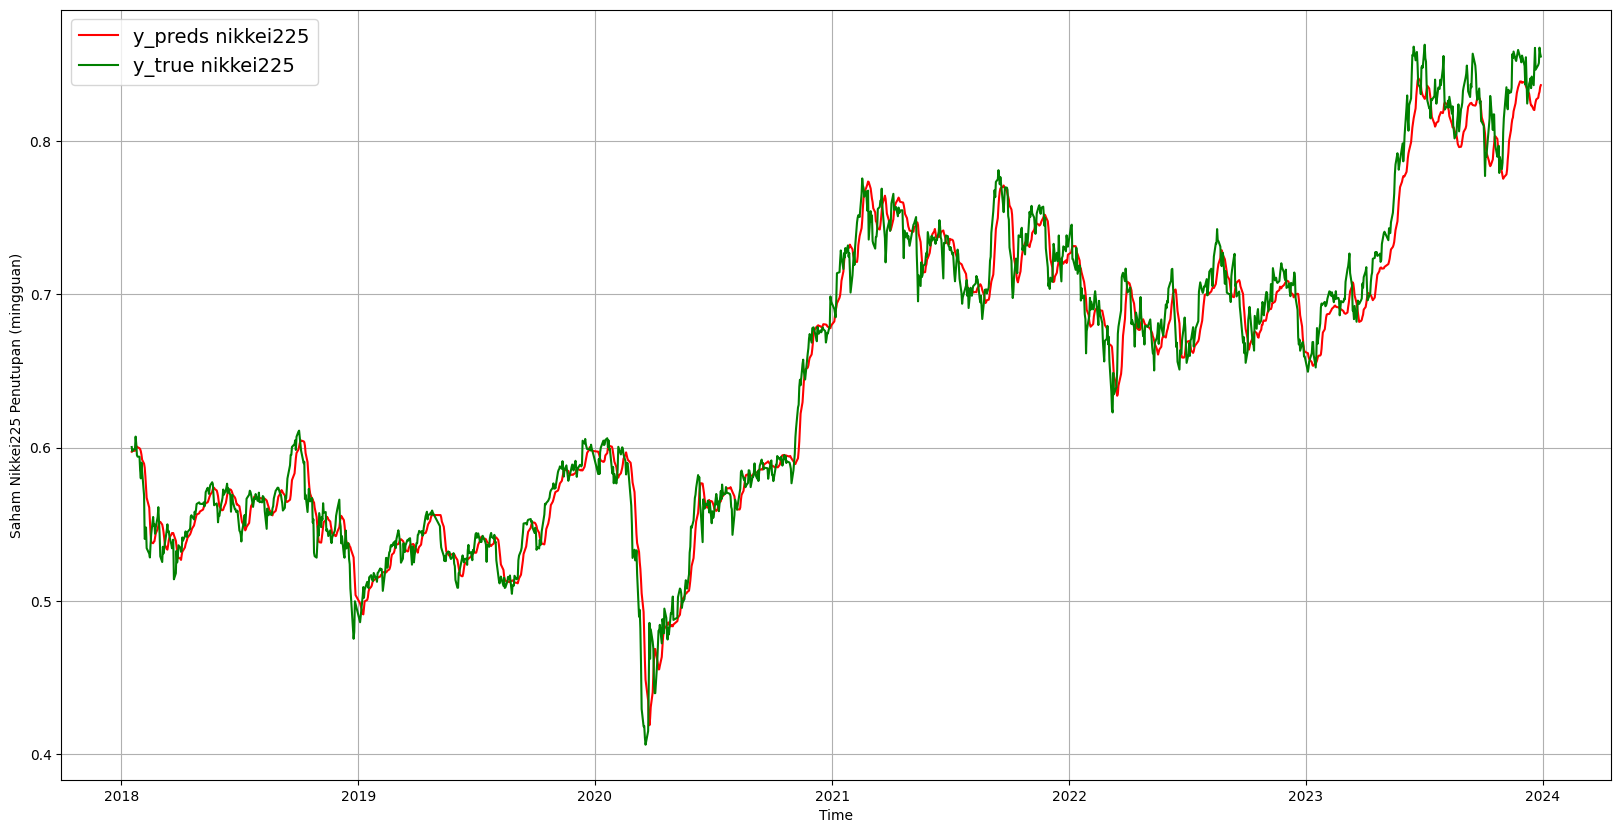

In [161]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_3_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


simpan model trained ke bentuk .h5

In [162]:
from tensorflow.keras.models import save_model

# Assuming you have already trained your model and named it "model_3"
# Save the model to disk as a .h5 file
save_model(model_3, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_3_stackedLSTM_multivariate.h5")

<ipython-input-162-604894ac9b4a>:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_3, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_3_stackedLSTM_multivariate.h5")


# Model 4 : Bidirectional LSTM

In [165]:
train_windows.shape[2]

3

## Tuner Builder

In [166]:
tf.random.set_seed(42)

def model_bidirectional_LSTM_multi_builder(hp):
  model_4 = tf.keras.models.Sequential([
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = hp.Int('bi_lstm_n_units', min_value=32, max_value=256, step=32),
                                                            input_shape=(train_windows.shape[1], train_windows.shape[2]),
                                                            return_sequences = False,
                                                            activation = "relu")),
          #tf.keras.layers.Dropout(0.2, seed=42),
          #tf.keras.layers.LSTM(128, return_sequences = False, activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(test_labels.shape[1])
          ], name = "model_4_bidirectionalLSTM_multivariate")



  #compile model 4
  model_4.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_4

In [167]:
import keras_tuner as kt

tuner_bi_LSTM_multi = kt.Hyperband(model_bidirectional_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='bi_LSTM_multivariate')

## Proses tuning


In [168]:
tuner_bi_LSTM_multi.search(train_windows, train_labels, epochs=10, validation_data=(test_windows, test_labels))

Trial 30 Complete [00h 01m 26s]
val_loss: 0.007542100735008717

Best val_loss So Far: 0.004062175750732422
Total elapsed time: 00h 26m 25s


## Hasil parameter tuning terbaik

In [170]:
# Get the optimal hyperparameters
best_hps=tuner_bi_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ["bi_lstm_n_units", 'learning_rate']
print('Best tune model bidirectional LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model bidirectional LSTM multivariate:
bi_lstm_n_units: 192
learning_rate: 0.01


## Hasil parameter tuning 10 terbaik

In [171]:
tuning = ["bi_lstm_n_units", 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps=tuner_bi_LSTM_multi.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('hp_top10_bi_LSTM_multi.csv')
df_top10


,bi_lstm_n_units,learning_rate
0,192,0.0100
1,96,0.0100
2,192,0.0100
3,64,0.0010
4,256,0.0001
5,256,0.0010
6,160,0.0001
7,256,0.0001
8,256,0.0010
9,256,0.0001


## copy csv best 10 hyperparameter ke drive

In [172]:
import shutil
shutil.copy('/content/hp_top10_bi_LSTM_multi.csv', '/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/best_hyperparameter_models')

'/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/best_hyperparameter_models/hp_top10_bi_LSTM_multi.csv'

In [173]:
tuner_bi_LSTM_multi.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/bi_LSTM_multivariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0024 summary
Hyperparameters:
bi_lstm_n_units: 192
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0023
Score: 0.004062175750732422

Trial 0028 summary
Hyperparameters:
bi_lstm_n_units: 96
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005264888051897287

Trial 0023 summary
Hyperparameters:
bi_lstm_n_units: 192
learning_rate: 0.01
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.005585554987192154

Trial 0027 summary
Hyperparameters:
bi_lstm_n_units: 64
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.006052517797797918

Trial 0016 summary
Hyperparameters:
bi_lstm_n_units: 256
learning_rate: 0.0001
tuner/epo

## Mengimplementasikan hyperparameter terbaik ke model

In [174]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_4 = tuner_bi_LSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [176]:

# fit
history = model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 100,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

Epoch 1/100
103/103 [==============================] - ETA: 0s - loss: 0.0135
Epoch 1: val_loss improved from inf to 0.02289, saving model to model_experiments/model_4_bidirectionalLSTM_multivariate
103/103 [==============================] - 14s 140ms/step - loss: 0.0135 - val_loss: 0.0229
Epoch 2/100
103/103 [==============================] - ETA: 0s - loss: 0.0118
Epoch 2: val_loss improved from 0.02289 to 0.01173, saving model to model_experiments/model_4_bidirectionalLSTM_multivariate
103/103 [==============================] - 12s 115ms/step - loss: 0.0118 - val_loss: 0.0117
Epoch 3/100
103/103 [==============================] - ETA: 0s - loss: 0.0098
Epoch 3: val_loss did not improve from 0.01173
103/103 [==============================] - 6s 59ms/step - loss: 0.0098 - val_loss: 0.0127
Epoch 4/100
103/103 [==============================] - ETA: 0s - loss: 0.0102
Epoch 4: val_loss improved from 0.01173 to 0.01067, saving model to model_experiments/model_4_bidirectionalLSTM_multivari

In [177]:
model_4.summary()

Model: "model_4_bidirectionalLSTM_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 384)               301056    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 3)                 1155      
                                                                 
Total params: 302211 (1.15 MB)
Trainable params: 302211 (1.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [178]:
# mengevaluasi model 6 dari epochs terakhir
model_4.evaluate(test_windows, test_labels)

46/46 [==============================] - 1s 12ms/step - loss: 0.0037


0.0037459784653037786

visualisasi loss setiap epoch

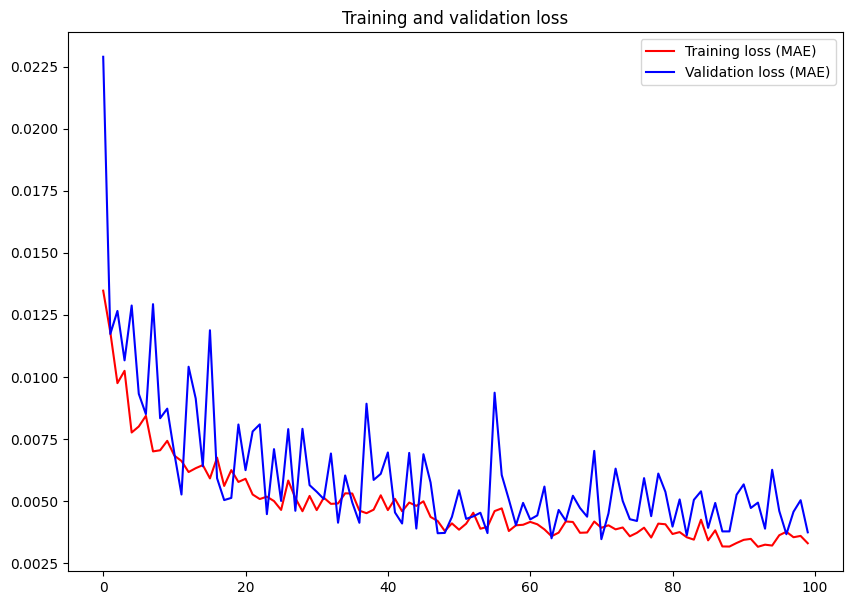

In [179]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
plt.figure(figsize = (10,7))
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss (MAE)')
plt.plot(epochs, val_loss, 'b', label='Validation loss (MAE)')
plt.title ('Training and validation loss')
plt.legend(loc=0)




In [180]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_4 = tf.keras.models.load_model("model_experiments/model_4_bidirectionalLSTM_multivariate")
model_4.evaluate(test_windows, test_labels)


46/46 [==============================] - 1s 12ms/step - loss: 0.0035


0.003469513263553381

In [181]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_4_preds = tf.squeeze(model_4.predict(test_windows))
model_4_preds



46/46 [==============================] - 1s 11ms/step


<tf.Tensor: shape=(1456, 3), dtype=float32, numpy=
array([[0.59947765, 0.13736613, 0.02304135],
       [0.5969977 , 0.13717133, 0.02262055],
       [0.59477663, 0.13705128, 0.02241405],
       ...,
       [0.84791577, 0.10431849, 0.02621575],
       [0.858158  , 0.1047955 , 0.02717754],
       [0.8531127 , 0.10441787, 0.02623992]], dtype=float32)>

In [182]:
model_4_preds[:,2]

<tf.Tensor: shape=(1456,), dtype=float32, numpy=
array([0.02304135, 0.02262055, 0.02241405, ..., 0.02621575, 0.02717754,
       0.02623992], dtype=float32)>

In [183]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_4_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_4_preds)

model_4_results

{'mae': 0.003469513,
 'mse': 3.513493e-05,
 'rmse': 0.004741954,
 'mape': 2.3043458,
 'R-square': -5425527.591636975}

In [184]:
tf.squeeze(test_labels[:,0])

<tf.Tensor: shape=(1456,), dtype=float64, numpy=
array([0.60032696, 0.59753888, 0.59872588, ..., 0.86096453, 0.857203  ,
       0.85519899])>

In [185]:
model_1_results

{'mae': 0.0040868474,
 'mse': 5.030499e-05,
 'rmse': 0.005414612,
 'mape': 4.930556,
 'R-square': -43881238.18847609}

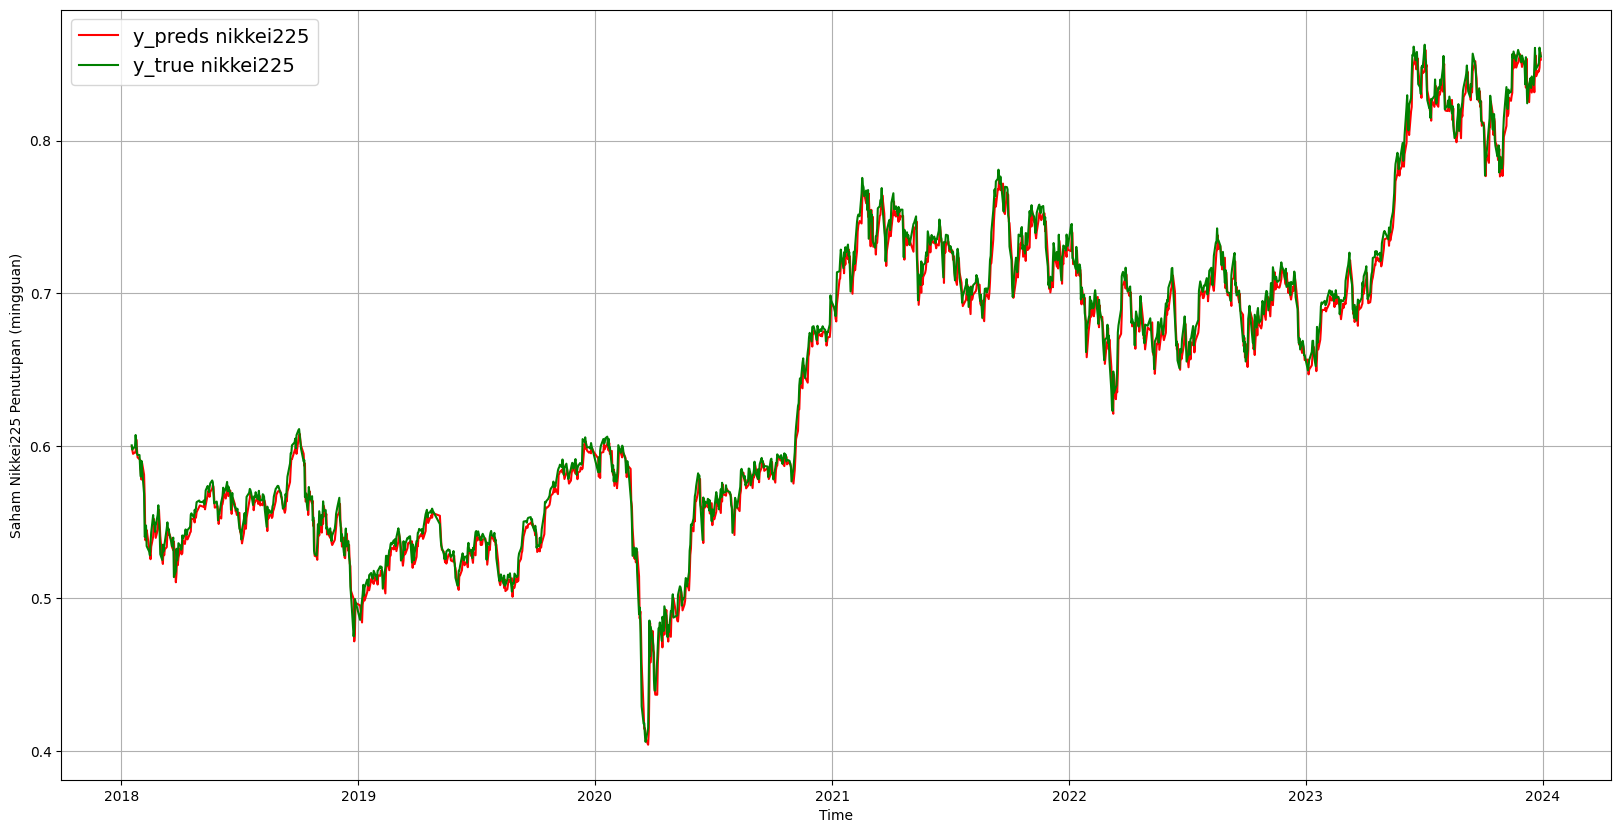

In [189]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_4_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


simpan model trained ke bentuk .h5

In [187]:
from tensorflow.keras.models import save_model

# Assuming you have already trained your model and named it "model_3"
# Save the model to disk as a .h5 file
save_model(model_4, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_4_bidirectionalLSTM_multivariate.h5")

<ipython-input-187-70c10e89b65b>:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_4, "/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/saved_models/model_4_bidirectionalLSTM_multivariate.h5")


# Model 5 : CNN-LSTM

## Tuner Builder

In [ ]:
tf.random.set_seed(42)

def model_CNN_LSTM_multi_builder(hp):
  model_5 = tf.keras.models.Sequential([
    # YOUR CODE HERE.
    tf.keras.layers.Conv1D(filters=hp.Int('Conv1D_n_filters', min_value=32, max_value=256, step=32),
                          kernel_size=hp.Int('Conv1_kernel_size', min_value=5, max_value=10, step=1),
                          strides=1,
                          padding="causal",
                          activation="relu",
                          input_shape=[train_windows.shape[1], train_windows.shape[2]]),

    tf.keras.layers.LSTM(units = hp.Int('LSTM_n_units', min_value=32, max_value=256, step=32),
                        return_sequences=False),

    tf.keras.layers.Dense(test_labels.shape[1]),
    ], name = "model_5_CNN-LSTM_multivariate")


  #compile model 5
  model_5.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_5

In [ ]:
import keras_tuner as kt

tuner_CNN_LSTM_multi = kt.Hyperband(model_CNN_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='CNN_LSTM_multivariate')

## Proses tuning


In [ ]:
tuner_CNN_LSTM_multi.search(train_windows, train_labels, epochs=10, validation_data=(test_windows, test_labels))

Trial 30 Complete [00h 00m 48s]
val_loss: 0.009675090201199055

Best val_loss So Far: 0.006911471951752901
Total elapsed time: 00h 29m 32s


## Hasil parameter tuning terbaik

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_CNN_LSTM_multi.get_best_hyperparameters(num_trials=1)[0]

tuning = ['Conv1D_n_filters', 'Conv1_kernel_size', "LSTM_n_units", 'learning_rate']
print('Best tune model CNN LSTM multivariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model LSTM multivariate:
lstm_n_units: 224
learning_rate: 0.0001


## Hasil parameter tuning 10 terbaik

In [ ]:
tuning = ['Conv1D_n_filters', 'Conv1_kernel_size', "LSTM_n_units", 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps=tuner_CNN_LSTM_multi.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('hp_top10_CNN_LSTM_multi.csv')
df_top10


tambahin kode buat copy ke drive csvnya

In [ ]:
tuner_CNN_LSTM_multi.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/LSTM_multivariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0028 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005664132069796324

Trial 0013 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.0001
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0008
Score: 0.006000229623168707

Trial 0016 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.006151640322059393

Trial 0027 summary
Hyperparameters:
lstm_n_units: 160
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.006159930024296045

Trial 0009 summary
Hyperparameters:
lstm_n_units: 96
learning_rate: 0.01
tu

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_5 = tuner_CNN_LSTM_multi.hypermodel.build(best_hps)

## Melatih model

In [ ]:

# fit
history = model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

In [ ]:
model_5.summary()

In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_5.evaluate(test_windows, test_labels)

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_5 = tf.keras.models.load_model("model_experiments/model_5_CNN-LSTM_multivariate")
model_5.evaluate(test_windows, test_labels)


In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_5_preds = tf.squeeze(model_5.predict(test_windows))
model_5_preds



In [ ]:
model_5_preds[:,2]

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_5_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_5_preds)

model_5_results

In [ ]:
tf.squeeze(test_labels[:,0])

In [ ]:
test_labels[:, 0]

In [ ]:
model_5_results

In [ ]:
model_2_results

In [ ]:
model_5_results

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_5_preds[:,0], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Membuat univariate time series forecasting stock price

In [ ]:
print(full_windows[:, 0]),
print(full_windows[:, 0].shape)
print("\n")
print(full_labels[:, 0])
print(full_labels[:, 0].shape)

In [ ]:
plt.figure(figsize = (20,7))
plot_time_series(timesteps = nikkei225_close_multivariate_df.index.tolist(), values = normalized_data[:,0], format = "-", label = "Nikkei225 Closing Price (Yen)", color = 'b')

memanggil variabel window dan label untuk univariate nikkei stock price

In [ ]:
X_nikkei.shape, y_nikkei.shape

reshape dimensi X_nikkei dan y_nikkei dan masukkan ke variabel baru

In [ ]:
train_nikkeiWindows = np.squeeze(X_nikkei[:train_size])
test_nikkeiWindows = np.squeeze(X_nikkei[train_size:])

train_nikkeiLabels = np.squeeze(y_nikkei[:train_size])
test_nikkeiLabels = np.squeeze(y_nikkei[train_size:])

In [ ]:
train_nikkeiWindows.shape, test_nikkeiWindows.shape

In [ ]:
train_nikkeiWindows.shape[1]

In [ ]:
train_nikkeiLabels.shape, test_nikkeiLabels.shape

# Model 6: Conv1D Univariate

In [ ]:
train_nikkeiWindows.shape

## Tuner Builder

In [ ]:
tf.random.set_seed(42)

#create Conv1D model
def model_Conv1D_uni_builder(hp):
  model_6 = tf.keras.models.Sequential([
      #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
      tf.keras.layers.Conv1D(filters = hp.Int('conv1D_n_filters', min_value=32, max_value=256, step=32),
                             kernel_size = hp.Int('conv1D_kernel_size', min_value=5, max_value=10, step=1),
                             strides = 1,
                             padding ="causal",
                             input_shape = (WINDOW_SIZE, 1)),
      tf.keras.layers.GlobalMaxPooling1D(),  # Add GlobalMaxPooling1D layer
      tf.keras.layers.Dense(1)

      #filters adalah jumlah hidden unit dalam layers tersebut
      # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
      # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
  ], name = "model_6_conv1D_univariate")

  #compile model 1
  model_6.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_6

In [ ]:
import keras_tuner as kt

tuner_Conv1D_uni = kt.Hyperband(model_Conv1D_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='Conv1D_univariate')

## Proses tuning


In [ ]:
tuner_Conv1D_uni.search(train_nikkeiWindows, train_nikkeiLabels, epochs=10, validation_data=(test_nikkeiWindows, test_nikkeiLabels))

Trial 30 Complete [00h 00m 17s]
val_loss: 0.057879187166690826

Best val_loss So Far: 0.0041896020993590355
Total elapsed time: 00h 04m 50s


## Hasil parameter tuning terbaik

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_Conv1D_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
print('Best tune model Conv1D univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

## Hasil parameter tuning 10 terbaik

In [ ]:
tuning =['conv1D_n_filters', 'conv1D_kernel_size', 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps = tuner_Conv1D_uni.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('hp_top10_Con1D_uni.csv')
df_top10


tambahin kode buat copy ke drive csvnya

In [ ]:
tuner_Conv1D_uni.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/Conv1D_multivariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0017 summary
Hyperparameters:
conv1_n_filters: 160
conv1_kernel_size: 8
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.0041896020993590355

Trial 0016 summary
Hyperparameters:
conv1_n_filters: 96
conv1_kernel_size: 10
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.004905304871499538

Trial 0024 summary
Hyperparameters:
conv1_n_filters: 96
conv1_kernel_size: 10
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0018
Score: 0.004977079574018717

Trial 0028 summary
Hyperparameters:
conv1_n_filters: 224
conv1_kernel_size: 9
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0


## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_6 = tuner_Conv1D_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:

# fit
model_6.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

In [ ]:
model_6.summary()

In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_6.evaluate(test_nikkeiWindows, test_nikkeiLabels)

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_6 = tf.keras.models.load_model("model_experiments/model_6_conv1D_univariate")
model_6.evaluate(test_nikkeiWindows, test_nikkeiLabels)


In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_6_preds = tf.squeeze(model_6.predict(test_nikkeiWindows))
model_6_preds



In [ ]:
model_6_preds[:2]

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_6_results = evaluate_preds(y_true = test_nikkeiLabels,
                                 y_pred = model_6_preds)

model_6_results

In [ ]:
tf.squeeze(test_nikkeiLabels[:])

In [ ]:
test_nikkeiLabels[:]

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_6_preds[:], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Model 7: LSTM Univariate

## Tuner Builder

In [ ]:

tf.random.set_seed(42)

# membuat model LSTM dengan hyperparameter tuning

def model_LSTM_uni_builder(hp):
  model_7 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units', min_value=32, max_value=256, step=32),
                               input_shape=(WINDOW_SIZE, 1),
                               return_sequences = False,
                               activation = "relu"),
          #tf.keras.layers.Dropout(0.2),
          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(1, activation = "relu")
          ], name = "model_7_LSTM_univariate")



  #compile model 2
  model_7.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_7

In [ ]:
import keras_tuner as kt

tuner_LSTM_uni = kt.Hyperband(model_LSTM_uni_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='LSTM_univariate')

## Proses tuning


In [ ]:
tuner_LSTM_uni.search(train_nikkeiWindows, train_nikkeiLabels, epochs=10, validation_data=(test_nikkeiWindows, test_nikkeiLabels))

Trial 30 Complete [00h 02m 04s]
val_loss: 0.006474567111581564

Best val_loss So Far: 0.005664132069796324
Total elapsed time: 00h 19m 06s


## Hasil parameter tuning terbaik

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_LSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units', 'learning_rate']
print('Best tune model LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model LSTM multivariate:
lstm_n_units: 192
learning_rate: 0.001


## Hasil parameter tuning 10 terbaik

In [ ]:
tuning =['lstm_n_units', 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps=tuner_LSTM_uni.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('hp_top10_LSTM_uni.csv')
df_top10


tambahin kode buat copy ke drive csvnya

In [ ]:
tuner_LSTM_uni.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/LSTM_multivariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0028 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005664132069796324

Trial 0013 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.0001
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0008
Score: 0.006000229623168707

Trial 0016 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.006151640322059393

Trial 0027 summary
Hyperparameters:
lstm_n_units: 160
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.006159930024296045

Trial 0009 summary
Hyperparameters:
lstm_n_units: 96
learning_rate: 0.01
tu

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_7 = tuner_LSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:

# fit
history = model_7.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 50,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_7.name)])

In [ ]:
model_7.summary()

In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_7.evaluate(test_nikkeiWindows, test_nikkeiLabels)

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_7 = tf.keras.models.load_model("model_experiments/model_7_LSTM_univariate")
model_7.evaluate(test_nikkeiWindows, test_nikkeiLabels)


In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_7_preds = tf.squeeze(model_7.predict(test_nikkeiWindows))
model_7_preds



In [ ]:
model_7_preds[:2]

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_7_results = evaluate_preds(y_true = test_nikkeiLabels,
                                 y_pred = model_7_preds)

model_7_results

In [ ]:
tf.squeeze(test_nikkeiLabels[:])

In [ ]:
test_nikkeiLabels[:]

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_7_preds[:], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


 # Model 8 : Stacked LSTM univariate

## Tuner builder

In [ ]:

tf.random.set_seed(42)

# membuat model LSTM dengan hyperparameter tuning
def model_stackedLSTM_uni_builder(hp):

  model_8 = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(units =  hp.Int('lstm_n_units', min_value=32, max_value=256, step=32),
                              input_shape=(WINDOW_SIZE, 1),
                              return_sequences = True,
                              activation = "relu"),

          #tf.keras.layers.Dropout(0.2, seed=42),
          tf.keras.layers.LSTM(units = hp.Int('lstm_n_units_2', min_value=32, max_value=256, step=32),
                              return_sequences = False,
                              activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(1)
          ], name = "model_8_stackedLSTM_univariate")


  #compile model 8
  model_8.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_8

In [ ]:
import keras_tuner as kt

tuner_stackedLSTM_uni = kt.Hyperband(model_stacked_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='stackedLSTM_univariate')

## Proses tuning


In [ ]:
tuner_stackedLSTM_uni.search(train_nikkeiWindows, train_nikkeiLabels, epochs=10, validation_data=(test_nikkeiWindows, test_nikkeiLabels))

Trial 30 Complete [00h 00m 48s]
val_loss: 0.009675090201199055

Best val_loss So Far: 0.006911471951752901
Total elapsed time: 00h 29m 32s


## Hasil parameter tuning terbaik

In [ ]:
# Get the optimal hyperparameters
best_hps = tuner_stackedLSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['lstm_n_units', "lstm_n_units_2", 'learning_rate']
print('Best tune model stacked LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model LSTM multivariate:
lstm_n_units: 224
learning_rate: 0.0001


## Hasil parameter tuning 10 terbaik

In [ ]:
tuning = ['lstm_n_units', "lstm_n_units_2", 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps = tuner_stackedLSTM_uni.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('hp_top10_Stacked_LSTM_uni.csv')
df_top10


tambahin kode buat copy ke drive csvnya

In [ ]:
tuner_stackedLSTM_uni.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/LSTM_multivariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0028 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005664132069796324

Trial 0013 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.0001
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0008
Score: 0.006000229623168707

Trial 0016 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.006151640322059393

Trial 0027 summary
Hyperparameters:
lstm_n_units: 160
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.006159930024296045

Trial 0009 summary
Hyperparameters:
lstm_n_units: 96
learning_rate: 0.01
tu

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_8 = tuner_stackedLSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:

# fit
history = model_8.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_8.name)])

In [ ]:
model_8.summary()

In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_8.evaluate(test_nikkeiWindows, test_nikkeiLabels)

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_8 = tf.keras.models.load_model("model_experiments/model_8_stackedLSTM_univariate")
model_8.evaluate(test_nikkeiWindows, test_nikkeiLabels)


In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_8_preds = tf.squeeze(model_8.predict(test_nikkeiWindows))
model_8_preds



In [ ]:
model_8_preds[:2]

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_8_results = evaluate_preds(y_true = test_nikkeiLabels,
                                 y_pred = model_8_preds)

model_8_results

In [ ]:
tf.squeeze(test_nikkeiLabels[:])

In [ ]:
test_nikkeiLabels[:]

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_8_preds[:], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Model 9: Bidirectional LSTM Univariate

In [ ]:
train_nikkeiWindows.shape

In [ ]:
test_nikkeiLabels.shape

## Tuner Builder

In [ ]:
tf.random.set_seed(42)

def model_bidirectional_LSTM_uni_builder(hp):
  model_9 = tf.keras.models.Sequential([
          #tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
          tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), # ini lambda layer sumberny dari bangkit C4W3 lab1
                        input_shape=[WINDOW_SIZE]),

          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = hp.Int('bi_lstm_n_units', min_value=32, max_value=256, step=32),
                                                             input_shape=(WINDOW_SIZE, 1),
                                                             return_sequences = False,
                                                             activation = "relu")),
          #tf.keras.layers.Dropout(0.2, seed=42),
          #tf.keras.layers.LSTM(128, return_sequences = False, activation = "relu"),

          #tf.keras.layers.LSTM(128, return_sequences=False, activation = "relu"),

          tf.keras.layers.Dense(1)
          ], name = "model_9_bidirectionalLSTM_univariate")


  #compile model 2
  model_9.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_9

In [ ]:
import keras_tuner as kt

tuner_bi_LSTM_uni = kt.Hyperband(model_bidirectional_LSTM_multi_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='/content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs',
                     project_name='bi_LSTM_univariate')

## Proses tuning


In [ ]:
tuner_bi_LSTM_uni.search(train_nikkeiWindows, train_nikkeiLabels, epochs=10, validation_data=(test_nikkeiWindows, test_nikkeiLabels))

Trial 30 Complete [00h 00m 48s]
val_loss: 0.009675090201199055

Best val_loss So Far: 0.006911471951752901
Total elapsed time: 00h 29m 32s


## Hasil parameter tuning terbaik

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_bi_LSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ["bi_lstm_n_units", 'learning_rate']
print('Best tune model bidirectional LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model LSTM multivariate:
lstm_n_units: 224
learning_rate: 0.0001


## Hasil parameter tuning 10 terbaik

In [ ]:
tuning = ["bi_lstm_n_units", 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps=tuner_bi_LSTM_uni.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('hp_top10_bi_LSTM_uni.csv')
df_top10


tambahin kode buat copy ke drive csvnya

In [ ]:
tuner_bi_LSTM_uni.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/LSTM_multivariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0028 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005664132069796324

Trial 0013 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.0001
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0008
Score: 0.006000229623168707

Trial 0016 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.006151640322059393

Trial 0027 summary
Hyperparameters:
lstm_n_units: 160
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.006159930024296045

Trial 0009 summary
Hyperparameters:
lstm_n_units: 96
learning_rate: 0.01
tu

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_9 = tuner_bi_LSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:

# fit
history = model_9.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_9.name)])

In [ ]:
model_9.summary()

In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_9.evaluate(test_nikkeiWindows, test_nikkeiLabels)

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_9 = tf.keras.models.load_model("model_experiments/model_9_bidirectionalLSTM_univariate")
model_9.evaluate(test_nikkeiWindows, test_nikkeiLabels)


In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_9_preds = tf.squeeze(model_9.predict(test_nikkeiWindows))
model_9_preds



In [ ]:
model_9_preds[:2]

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_9_results = evaluate_preds(y_true = test_nikkeiLabels,
                                 y_pred = model_9_preds)

model_9_results

In [ ]:
tf.squeeze(test_nikkeiLabels[:])

In [ ]:
test_nikkeiLabels[:]

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_9_preds[:], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# Model 10: CNN-LSTM Univariate

## Tuner Builder

In [ ]:
tf.random.set_seed(42)

#create Conv1D model
def model_CNN_LSTM_uni_builder(hp):
  model_10 = tf.keras.models.Sequential([
      #layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
      tf.keras.layers.Conv1D(filters=hp.Int('Conv1D_n_filters', min_value=32, max_value=256, step=32),
                             kernel_size=hp.Int('Conv1_kernel_size', min_value=5, max_value=10, step=1),
                             strides=1,
                             padding="causal",
                             activation="relu",
                             input_shape=[WINDOW_SIZE, 1]),

      tf.keras.layers.LSTM(units = hp.Int('LSTM_n_units', min_value=32, max_value=256, step=32),
                           return_sequences=False),

      tf.keras.layers.Dense(1),
      #filters adalah jumlah hidden unit dalam layers tersebut
      # kernel size adalah ukuran dari window. Ex: kernel_size = 7 artinya melihat 7 value sekaligus
      # default nilai strides = 1, ini sudah sesuai karena sliding window bergeser satu timesteps
  ], name = "model_10_CNN-LSTM_univariate")

  #compile model 10
  model_10.compile(loss="mae",
                  optimizer = tf.keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])))

  return model_10

## Proses tuning


In [ ]:
tuner_CNN_LSTM_uni.search(train_nikkeiWindows, train_nikkeiLabels, epochs=10, validation_data=(test_nikkeiWindows, test_nikkeiLabels))

Trial 30 Complete [00h 00m 48s]
val_loss: 0.009675090201199055

Best val_loss So Far: 0.006911471951752901
Total elapsed time: 00h 29m 32s


## Hasil parameter tuning terbaik

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner_CNN_LSTM_uni.get_best_hyperparameters(num_trials=1)[0]

tuning = ['Conv1D_n_filters', 'Conv1_kernel_size', "LSTM_n_units", 'learning_rate']
print('Best tune model bidirectional LSTM univariate:')
for tune in tuning:
  print(f'{tune}: {best_hps.get(tune)}')

Best tune model LSTM multivariate:
lstm_n_units: 224
learning_rate: 0.0001


## Hasil parameter tuning 10 terbaik

In [ ]:
tuning = ['Conv1D_n_filters', 'Conv1_kernel_size', "LSTM_n_units", 'learning_rate']
top10_hps_dict = dict(zip(tuning, [[] for _ in range(len(tuning))]))

top10_hps=tuner_CNN_LSTM_uni.get_best_hyperparameters(num_trials=10)
for hps in top10_hps:
  for t in tuning:
    top10_hps_dict[t].append(hps.get(t))

df_top10 = pd.DataFrame(top10_hps_dict)
df_top10.to_csv('hp_top10_CNN_LSTM_uni.csv')
df_top10


tambahin kode buat copy ke drive csvnya

In [ ]:
tuner_CNN_LSTM_uni.results_summary(num_trials=10)

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/kenkyushimasu/tuning_logs/LSTM_multivariate
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0028 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.005664132069796324

Trial 0013 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.0001
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0008
Score: 0.006000229623168707

Trial 0016 summary
Hyperparameters:
lstm_n_units: 192
learning_rate: 0.0001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.006151640322059393

Trial 0027 summary
Hyperparameters:
lstm_n_units: 160
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.006159930024296045

Trial 0009 summary
Hyperparameters:
lstm_n_units: 96
learning_rate: 0.01
tu

## Mengimplementasikan hyperparameter terbaik ke model

In [ ]:
# best hyperparameter digunakan untuk hyperparameter model yang dibuat
model_10 = tuner_CNN_LSTM_uni.hypermodel.build(best_hps)

## Melatih model

In [ ]:

# fit
model_10.fit(train_nikkeiWindows,
            train_nikkeiLabels,
            batch_size=128,
            epochs = 10,
            verbose = 1,
            validation_data = (test_nikkeiWindows, test_nikkeiLabels),
            callbacks = [create_model_checkpoint(model_name = model_10.name)])

In [ ]:
model_10.summary()

In [ ]:
# mengevaluasi model 6 dari epochs terakhir
model_10.evaluate(test_nikkeiWindows, test_nikkeiLabels)

In [ ]:
# mengevaluasi dan load model 6 pada best epoch yang loss mae paling kecil sepanjang training

model_10= tf.keras.models.load_model("model_experiments/model_10_CNN-LSTM_univariate")
model_10.evaluate(test_nikkeiWindows, test_nikkeiLabels)


In [ ]:
# membuat predicted value berdasarkan model multivariate model_1 yang sudah di train

model_10_preds = tf.squeeze(model_10.predict(test_nikkeiWindows))
model_10_preds



In [ ]:
model_10_preds[:2]

In [ ]:
# mengukur predicted value dengan metrik evaluasi regresion problem

model_10_results = evaluate_preds(y_true = test_nikkeiLabels,
                                 y_pred = model_10_preds)

model_10_results

In [ ]:
tf.squeeze(test_nikkeiLabels[:])

In [ ]:
test_nikkeiLabels[:]

In [ ]:
plt.figure(figsize = (20,10))
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = model_10_preds[:], format = "-", label = "y_preds nikkei225", color = 'r')
plot_time_series(timesteps = nikkei225_close_multivariate_df[-(len(test_labels)):].index.tolist(), values = test_labels[:,0], format = "-", label = "y_true nikkei225", color = 'g')


# visualisasi hasil evaluasi metrik

In [ ]:
pd.DataFrame({
              "Conv1D": model_1_results["mae"],
              "LSTM": model_2_results["mae"],
              "Stacked LSTM" : model_3_results["mae"],
              "Bidirectional LSTM" : model_4_results["mae"],
              "CNN-LSTM": model_5_results["mae"],
              "Conv1D Univariate" : model_6_results["mae"],
              "LSTM univariate" : model_7_results["mae"],
              "Stacked LSTM Univariate" : model_8_results["mae"],
              "Bidirectional LSTM Univariate" : model_9_results["mae"],
              "CNN_LSTM Univariate" : model_10_results["mae"]},
             index = ["mae"]).plot(figsize = (10,7), kind = "bar")

In [ ]:
pd.DataFrame({
              "Conv1D": model_1_results["mse"],
              "LSTM": model_2_results["mse"],
              "Stacked LSTM" : model_3_results["mse"],
              "Bidirectional LSTM" : model_4_results["mse"],
              "CNN-LSTM": model_5_results["mse"],
              "Conv1D Univariate" : model_6_results["mse"],
              "LSTM univariate" : model_7_results["mse"],
              "Stacked LSTM Univariate" : model_8_results["mse"],
              "Bidirectional LSTM Univariate" : model_9_results["mse"],
              "CNN_LSTM Univariate" : model_10_results["mse"]},
             index = ["mse"]).plot(figsize = (10,7), kind = "bar")

In [ ]:
pd.DataFrame({
              "Conv1D": model_1_results["rmse"],
              "LSTM": model_2_results["rmse"],
              "Stacked LSTM" : model_3_results["rmse"],
              "Bidirectional LSTM" : model_4_results["rmse"],
              "CNN-LSTM": model_5_results["rmse"],
              "Conv1D Univariate" : model_6_results["rmse"],
              "LSTM univariate" : model_7_results["rmse"],
              "Stacked LSTM Univariate" : model_8_results["rmse"],
              "Bidirectional LSTM Univariate" : model_9_results["rmse"],
              "CNN_LSTM Univariate" : model_10_results["rmse"]},
             index = ["rmse"]).plot(figsize = (10,7), kind = "bar")

In [ ]:

pd.DataFrame({
              "Conv1D": model_1_results["mape"],
              "LSTM": model_2_results["mape"],
              "Stacked LSTM" : model_3_results["mape"],
              "Bidirectional LSTM" : model_4_results["mape"],
              "CNN-LSTM": model_5_results["mape"],
              "Conv1D Univariate" : model_6_results["mape"],
              "LSTM univariate" : model_7_results["mape"],
              "Stacked LSTM Univariate" : model_8_results["mape"],
              "Bidirectional LSTM Univariate" : model_9_results["mape"],
              "CNN_LSTM Univariate" : model_10_results["mape"]},
             index = ["mape"]).plot(figsize = (10,7), kind = "bar")